<h1>Модель предиктивной аналитики аномалий в работе оборудования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка,-предобработка" data-toc-modified-id="Загрузка,-предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка, предобработка</a></span><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка</a></span></li><li><span><a href="#Основная-информация" data-toc-modified-id="Основная-информация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Основная информация</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных,-обработка-пропусков,-удаление-дубликатов" data-toc-modified-id="Изменение-типа-данных,-обработка-пропусков,-удаление-дубликатов-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Изменение типа данных, обработка пропусков, удаление дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Графики-основных-датчиков-узла" data-toc-modified-id="Графики-основных-датчиков-узла-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Графики основных датчиков узла</a></span></li><li><span><a href="#Анализ-матрицы-корреляций" data-toc-modified-id="Анализ-матрицы-корреляций-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ матрицы корреляций</a></span></li><li><span><a href="#Масштабирование-данных" data-toc-modified-id="Масштабирование-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Масштабирование данных</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-типа-PCA-для-обнаружения-аномалий:" data-toc-modified-id="Модель-типа-PCA-для-обнаружения-аномалий:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель типа PCA для обнаружения аномалий:</a></span></li><li><span><a href="#Модель-автоэнкодера-для-обнаружения-аномалий" data-toc-modified-id="Модель-автоэнкодера-для-обнаружения-аномалий-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель автоэнкодера для обнаружения аномалий</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Введение

**ЦЕЛИ И ЗАДАЧИ ПРОЕКТА:**
    
**Цель** - разработка математической модели определения аномальной работы компрессора 250А с применением машинного обучения.

Под аномальной работой понимается состояние компрессора, которое не является нормой технологического режима его эксплуатации (прерывания/ошибки в работе датчиков, выбросы в данных и т.д.)

**Задачи:**
1. Загрузить и предобработать данные
2. Провести исследовательский анализ данных
3. Определить нормальную и аномальную работу компрессора;
4. Разделить выборку исходных данных на обучающую и тестовую;
5.	Подвести итоги исследования.

**Исходные данные**

* Период: 01.01.2021 - 01.06.2022
* Интервал значений - 1 минута

* Описание данных:

| № | Тег |	Наименование (англ.) | Наименование (рус.) | Ед.изм.|
| :----------------------: | :----------------------: | :----------------------: | :----------------------: | :----------------------: |
| 1 |KUPN:U200.PI8500.PV | SUCTION PRESSURE RECYCLE | Давление циркулирующего ВСГ на всасе в 250-C-250A V-1, Мпа PIRSAHHLL8500A/B/C | Mpag |
| 2 | KUPN:U200.TI8500.PV | SUCTION TEMPERATURE RECYCLE	| Температура циркулирующего ВСГ на всасе в 250-C-250A-V-1, ºС | °C |
| 3 | KUPN:U200.PI8501.PV | DISCHARGE PRESSURE RECYCLE	| Давление циркулирующего ВСГ на нагнетании в 250-C-250A-V-2, Мпа PIRSAHH8501А/В/С | Mpag |
| 4 | KUPN:U200.TI8501A.PV | DISCHARGE TEMPERATURE RECYCLE (2OO3)	| Температура циркулирующего ВСГ на нагнетании в 250-C-250A-V-2, ºС | °C |
| 5 | KUPN:U200.PI8520.PV | CAPACITY CONTROL N2 SUPPLY PRESSURE	| Давление азота на управление всасывающими клапанами цилиндров, Мпа | Mpag |
| 6 | KUPN:U200.TI8540.PV | TEMPERATURE IN CYLINDER OIL TANK	| Температура масла в 250-C-250А-V-10, ºС | °C |
| 7 | KUPN:U200.PI8540.PV | CYLINDER LUB. PRESSURE	| Давление масла в 250-C-250А-V-10, Мпа | Mpag |
| 8 | KUPN:U200.TI8571.PV | COOLANT RETURN TEMP. CYCLINDER RECYCLE	| Температура хладагента на выходе контура подпиточного газа 250-C-250А, ºС | °C |
| 9 | KUPN:U200.FI8570.PV | COOLANT RETURN FLOW RECYCLE	| Расход хладагента от цилиндра 250-C-250А в блок хладагента, м3/ч | m3/h |
| 10 | KUPN:U250.FIC2511.PV | RECYCLE & MAKEUP GAS COMPRESS TO 250-E-251 TUBEINLET	| Расход ВСГ, нм3/ч (кг/ч) | Nm3/h |
| 11 | KUPN:U200.VI8581.PV | CROSSHEAD VIBRATION RECYCLE	| Вибрация крейцкопфа – контур циркулирующего газа, g | g pk |
| 12 | KUPN:U200.ZI8583.PV | ROD POSITION RECYCLE	| Смещение поршневого штока – контур циркулирующего газа, мкм | µm |
| 13 | KUPN:U200.ZI8584.PV | ROD POSITION RECYCLE	| Смещение поршневого штока – контур циркулирующего газа, мкм | µm |
| 14 | KUPN:U200.TI8590.PV | SUCTION VALVE TEMPERATURE RECYCLE CE	| Температура клапана на всасе компрессора циркулирующего газа – сторона коленвала, ºС | °C |
| 15 | KUPN:U200.TI8591.PV | SUCTION VALVE TEMPERATURE RECYCLE HE	| Температура клапана на всасе компрессора циркулирующего газа - сторона головки, ºС | °C |
| 16 | KUPN:U200.TI8592.PV | DISCHARGE VALVE TEMPERATURE RECYCLE CE	| Температура клапана на нагнетании компрессора циркулирующего газа - сторона коленвала, ºС | °C |
| 17 | KUPN:U200.TI8593.PV | DISCHARGE VALVE TEMPERATURE RECYCLE HE	| Температура клапана на нагнетании компрессора циркулирующего газа - сторона головки, ºС | °C |
| 18 | target | 	| Целевой признак (класс), где  0 – аномалия, 1 – норма, 2 – простой оборудования |  |

## Загрузка, предобработка

### Загрузка

In [ ]:
# импорт библиотек
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm

!pip install catboost
!pip install hyperopt
from catboost import CatBoostClassifier
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight # определение веса классов
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

!pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 63 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
%%time

# загрузка файлов
df21 = pd.read_excel('2021.xlsx', 
                     index_col=[0],
                     parse_dates=True)
df22 = pd.read_excel('2022.xlsx', 
                     index_col=[0],
                     parse_dates=True)


CPU times: user 3min 31s, sys: 1.18 s, total: 3min 32s
Wall time: 3min 41s


In [ ]:
# объединение файлов
data = pd.concat([df21,df22])
df = data.copy()

### Основная информация

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744482 entries, 2021-01-01 00:00:00 to 2022-06-02 00:00:00
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   U200.PI8500.PV   744482 non-null  object 
 1   U200.TI8500.PV   744482 non-null  object 
 2   U200.PI8501.PV   744482 non-null  object 
 3   U200.TI8501A.PV  744482 non-null  object 
 4   U200.PI8520.PV   744482 non-null  object 
 5   U200.TI8540.PV   744482 non-null  object 
 6   U200.PI8540.PV   744482 non-null  object 
 7   U200.TI8571.PV   744482 non-null  object 
 8   U200.FI8570.PV   744482 non-null  object 
 9   U250.FIC2511.PV  744482 non-null  object 
 10  U200.VI8581.PV   744482 non-null  object 
 11  U200.ZI8583.PV   744482 non-null  object 
 12  U200.ZI8584.PV   744482 non-null  object 
 13  U200.TI8590.PV   744482 non-null  object 
 14  U200.TI8591.PV   744482 non-null  object 
 15  U200.TI8592.PV   744482 non-null  object 
 16  U200

In [ ]:
print('\n Начало таблицы: ')
display(df.head(5))

print('\n Конец таблицы: ') 
display(df.tail(5))


 Начало таблицы: 


,U200.PI8500.PV,U200.TI8500.PV,U200.PI8501.PV,U200.TI8501A.PV,U200.PI8520.PV,U200.TI8540.PV,U200.PI8540.PV,U200.TI8571.PV,U200.FI8570.PV,U250.FIC2511.PV,U200.VI8581.PV,U200.ZI8583.PV,U200.ZI8584.PV,U200.TI8590.PV,U200.TI8591.PV,U200.TI8592.PV,U200.TI8593.PV,target
Datetime,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,3.28,15.912886,3.28,12.5,0.48,30.648672,0,50,7.73,18757.121094,0,1,1,19,19,20,19,NaN
2021-01-01 00:01:00,3.28,15.889552,3.28,12.5,0.48,30.623932,0,50,7.73,18822.529297,0,1,1,19,19,20,19,NaN
2021-01-01 00:02:00,3.28,15.866218,3.28,12.5,0.48,30.598564,0,50,7.73,18801.378906,0,1,1,19,19,20,19,NaN
2021-01-01 00:03:00,3.28,15.842884,3.28,12.5,0.48,30.554554,0,50,7.73,18790.103516,0,1,1,19,19,20,19,NaN
2021-01-01 00:04:00,3.28,15.819551,3.28,12.5,0.48,30.510544,0,50,7.73,18780.044922,0,1,1,19,19,20,19,NaN



 Конец таблицы: 


,U200.PI8500.PV,U200.TI8500.PV,U200.PI8501.PV,U200.TI8501A.PV,U200.PI8520.PV,U200.TI8540.PV,U200.PI8540.PV,U200.TI8571.PV,U200.FI8570.PV,U250.FIC2511.PV,U200.VI8581.PV,U200.ZI8583.PV,U200.ZI8584.PV,U200.TI8590.PV,U200.TI8591.PV,U200.TI8592.PV,U200.TI8593.PV,target
Datetime,,,,,,,,,,,,,,,,,,
2022-06-01 23:56:00,3.12544,20.23875,4.74068,19.4,0.49,20.299999,-0.01,28.327715,7.73,17367.023438,0,3,1,26,26,26,26,0.0
2022-06-01 23:57:00,3.124357,20.231455,4.740346,19.4,0.49,20.299999,-0.01,28.32103,7.73,17285.25,0,3,1,26,26,26,26,0.0
2022-06-01 23:58:00,3.123274,20.224161,4.740013,19.4,0.49,20.299999,-0.01,28.314344,7.73,17309.480469,0,3,1,26,26,26,26,0.0
2022-06-01 23:59:00,3.122191,20.216866,4.740338,19.4,0.49,20.299999,-0.01,28.307659,7.73,17223.919922,0,3,1,26,26,26,26,0.0
2022-06-02 00:00:00,3.121107,20.20957,4.740691,19.4,0.49,20.280678,-0.01,28.300974,7.73,17267.099609,0,3,1,26,26,26,26,0.0


### Предобработка

#### Изменение типа данных, обработка пропусков, удаление дубликатов

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') # 

# заполним пропуски предыдущим значением    
df = df.fillna(method="ffill")

# удалим дублирующие строки
df.drop_duplicates(inplace=True)

# проверим
df.dtypes

U200.PI8500.PV     float64
U200.TI8500.PV     float64
U200.PI8501.PV     float64
U200.TI8501A.PV    float64
U200.PI8520.PV     float64
U200.TI8540.PV     float64
U200.PI8540.PV     float64
U200.TI8571.PV     float64
U200.FI8570.PV     float64
U250.FIC2511.PV    float64
U200.VI8581.PV     float64
U200.ZI8583.PV     float64
U200.ZI8584.PV     float64
U200.TI8590.PV     float64
U200.TI8591.PV     float64
U200.TI8592.PV     float64
U200.TI8593.PV     float64
target             float64
dtype: object

## Анализ данных

### Графики основных датчиков узла

Выведем показатели основных датчиков рассматриваемого узла:
* U200.TI8500.PV, 
* U200.TI8590.PV, 
* U200.TI8591.PV, 
* U200.TI8592.PV, 
* U200.TI8593.PV,
* U200.ZI8583.PV
* U200.ZI8584.PV

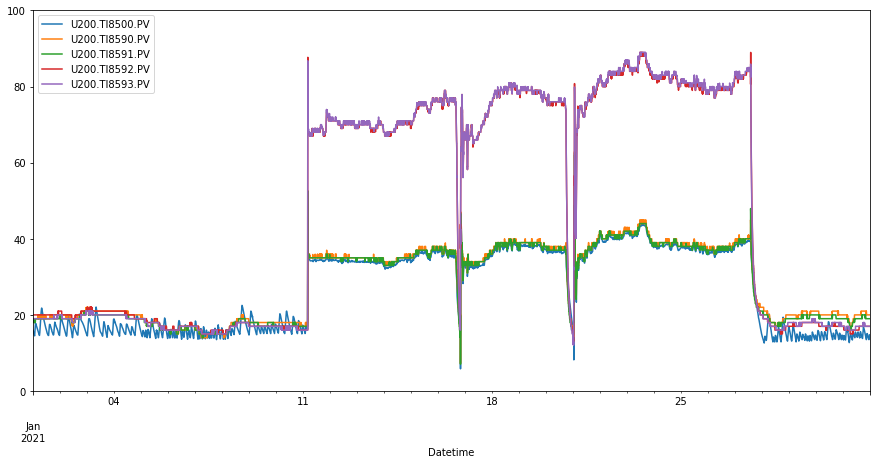

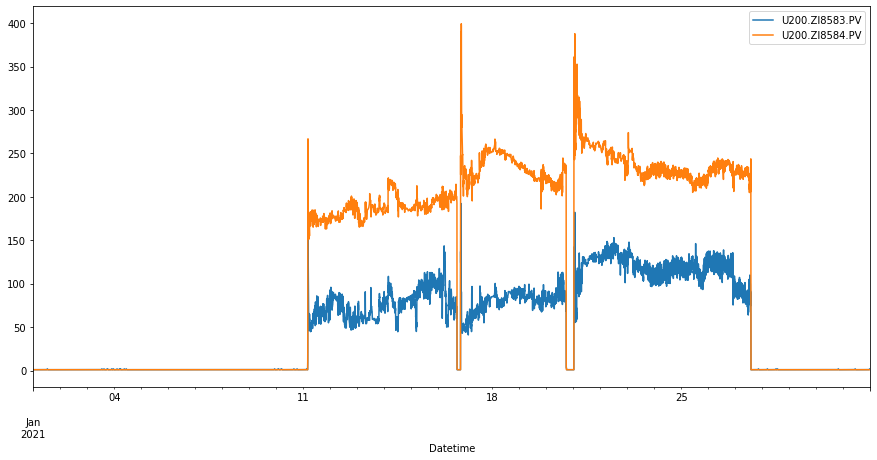

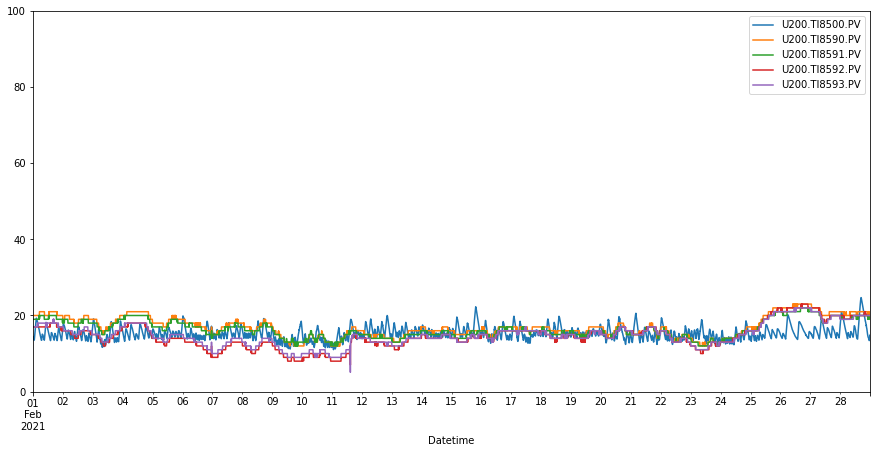

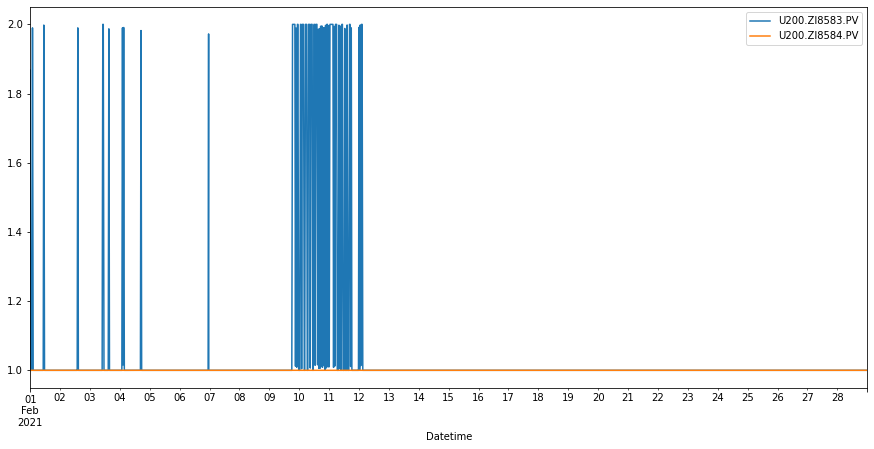

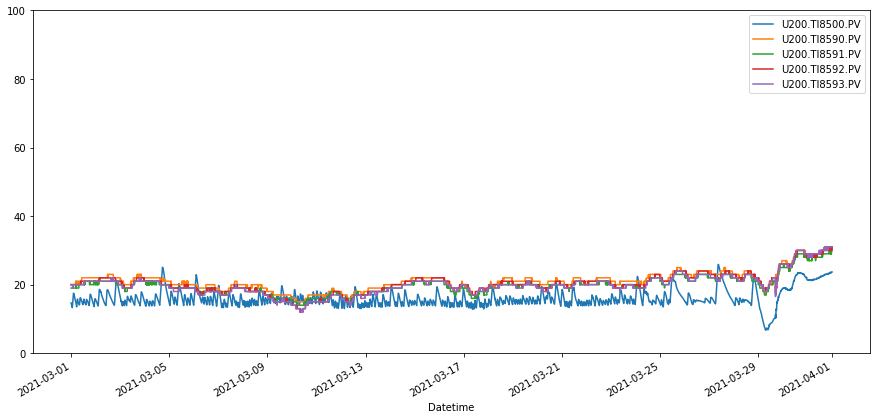

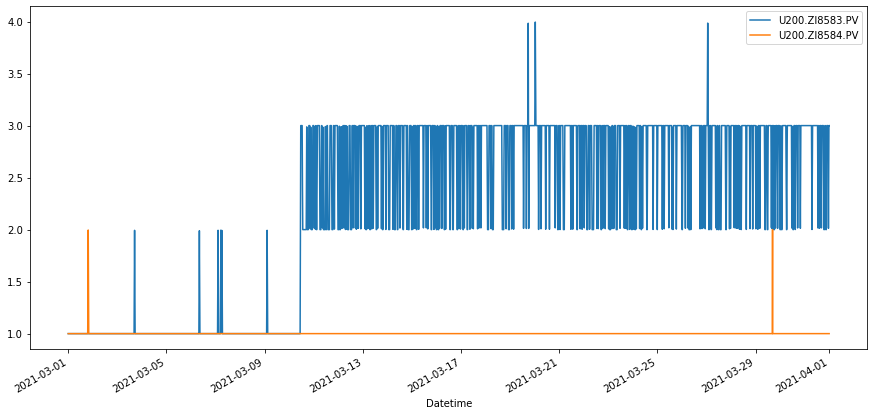

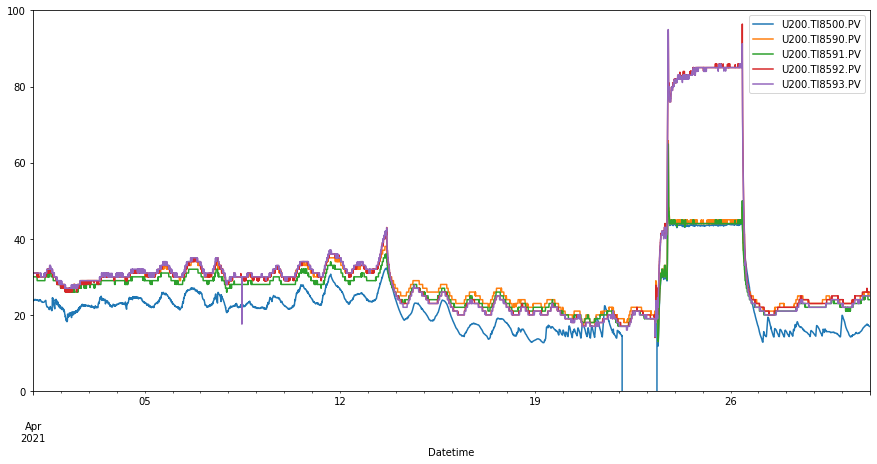

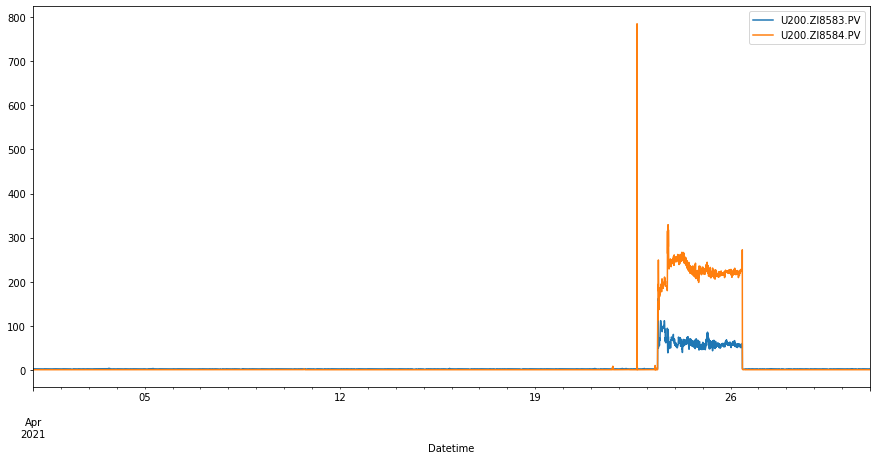

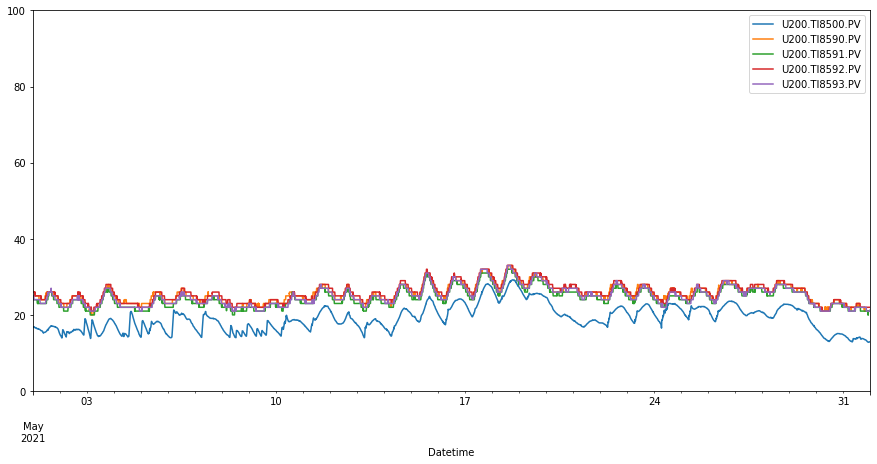

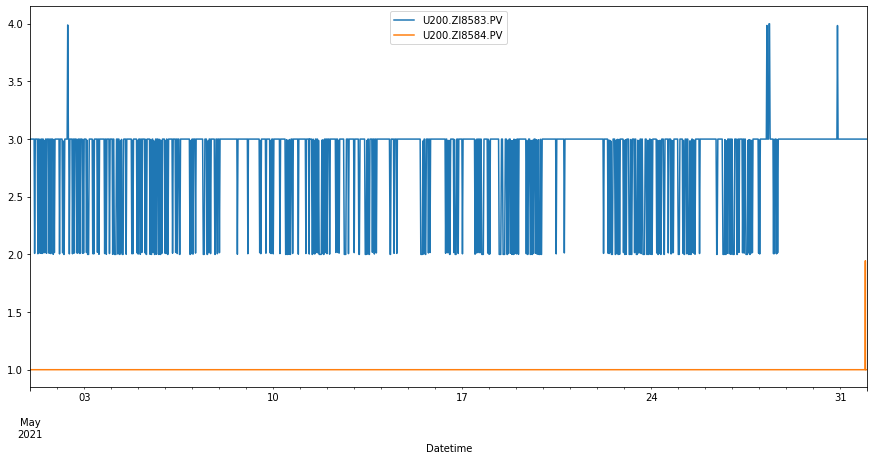

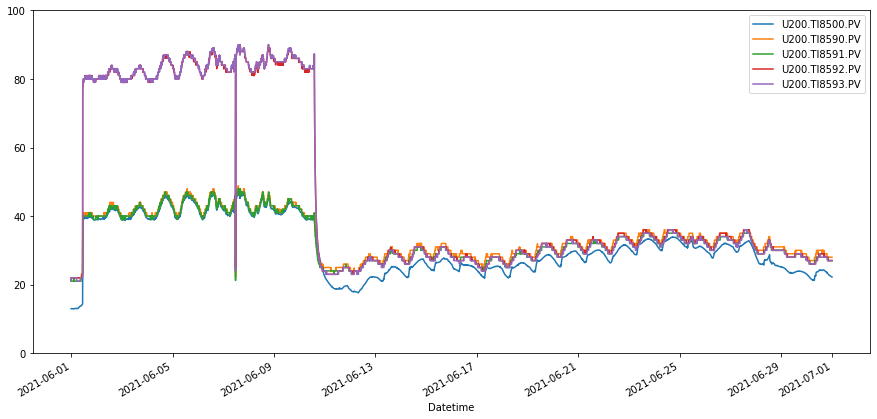

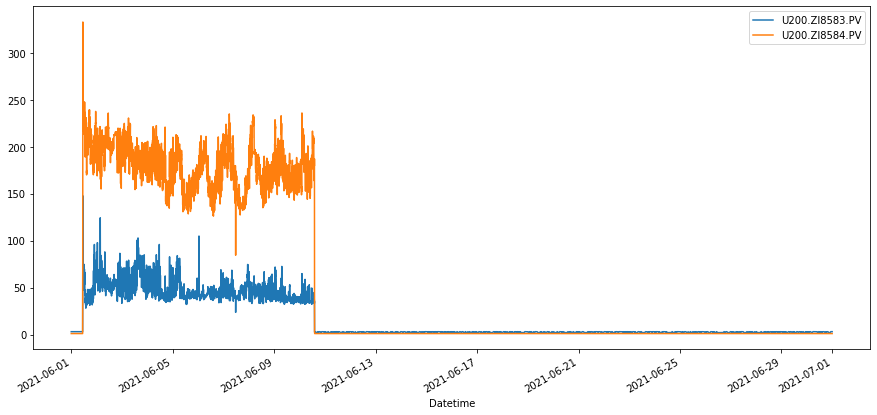

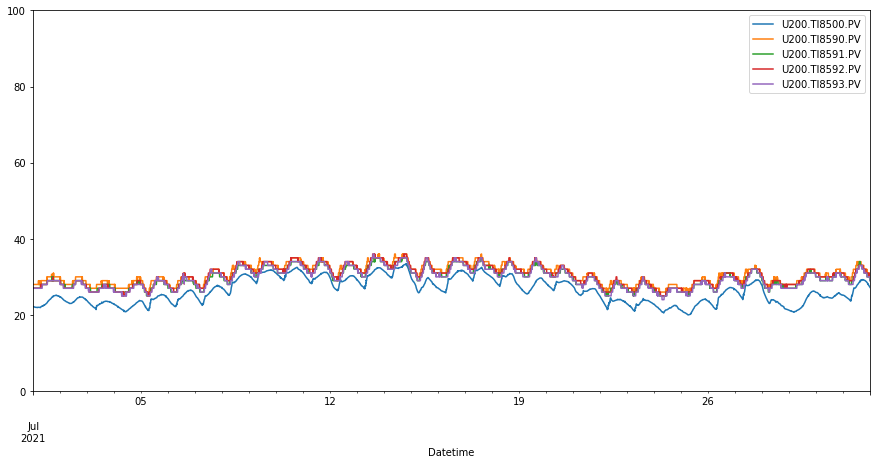

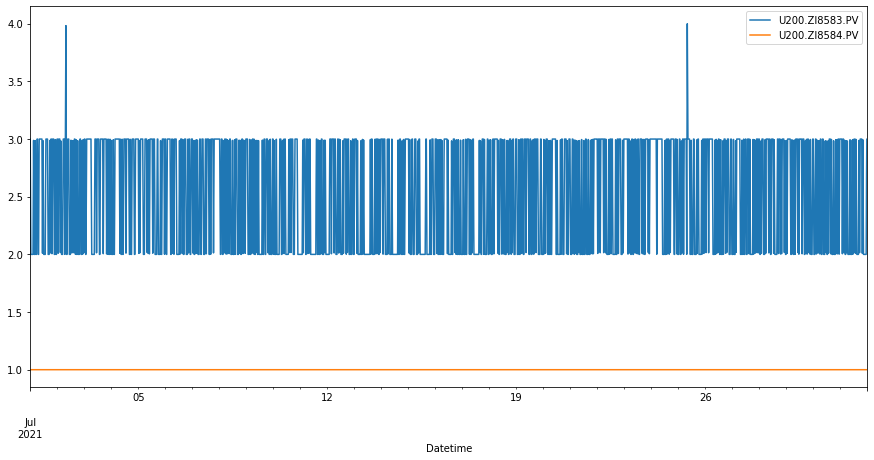

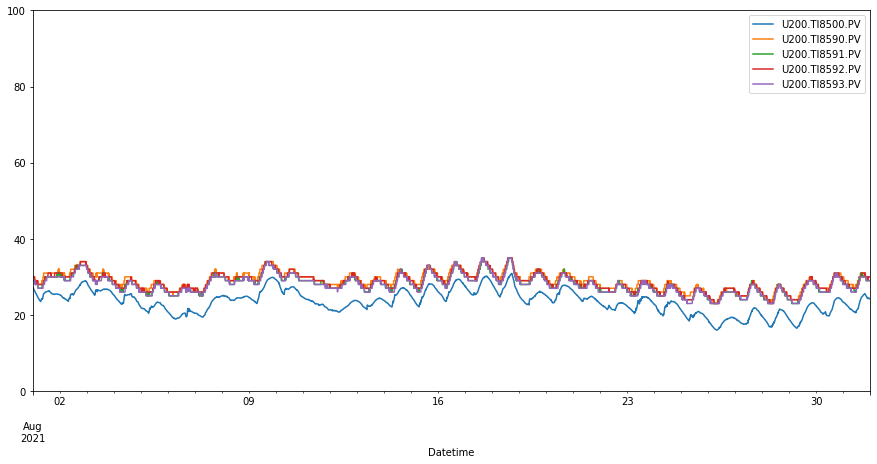

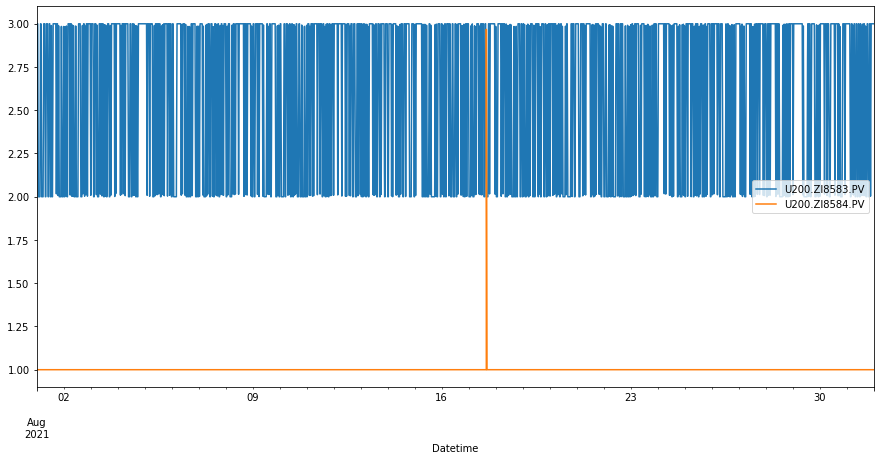

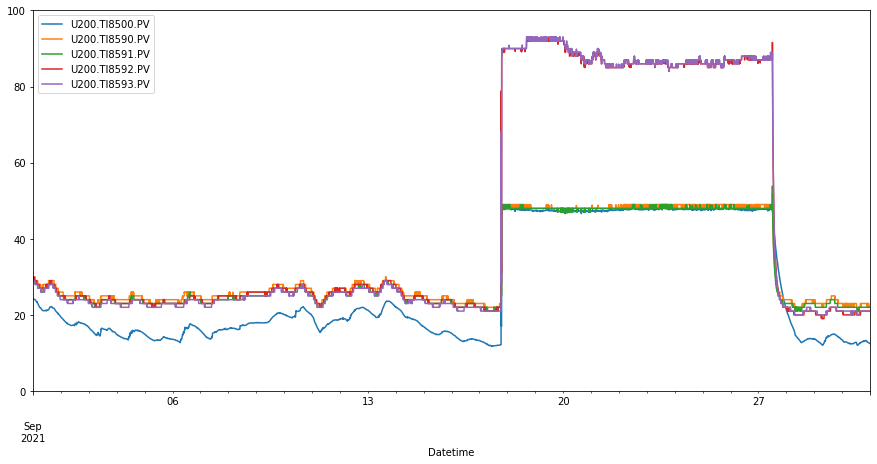

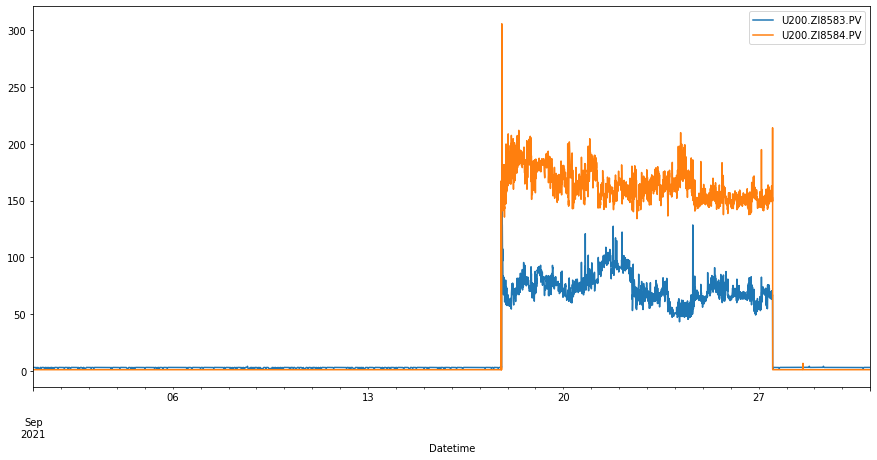

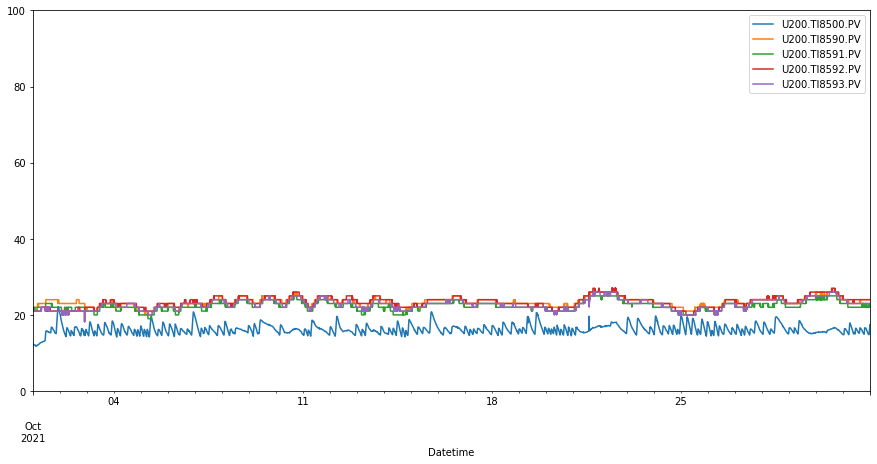

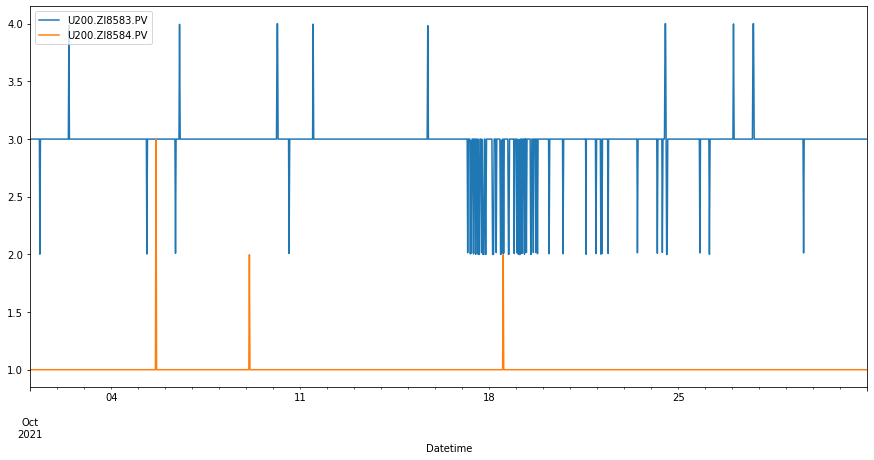

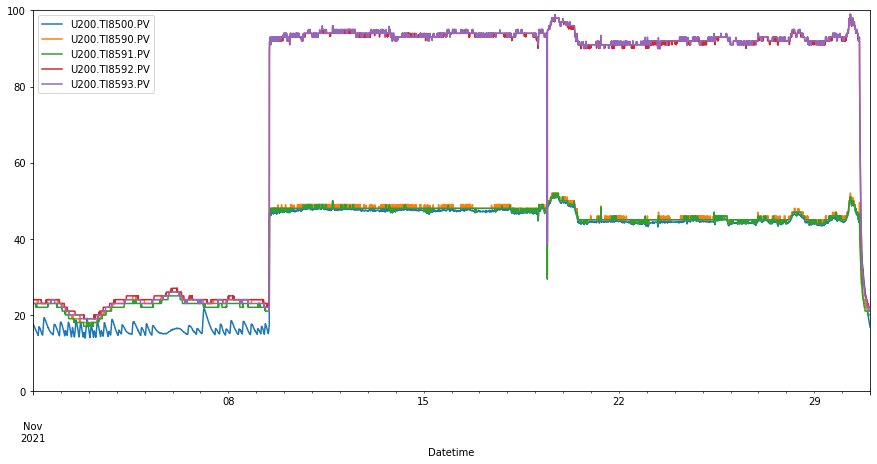

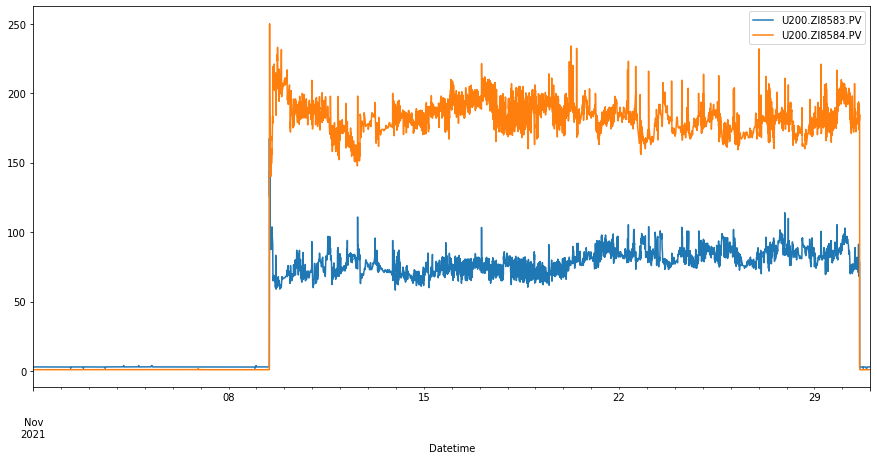

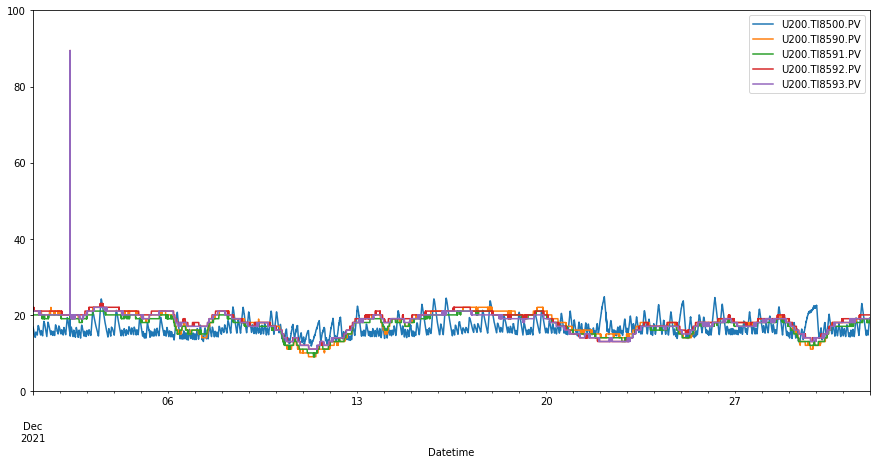

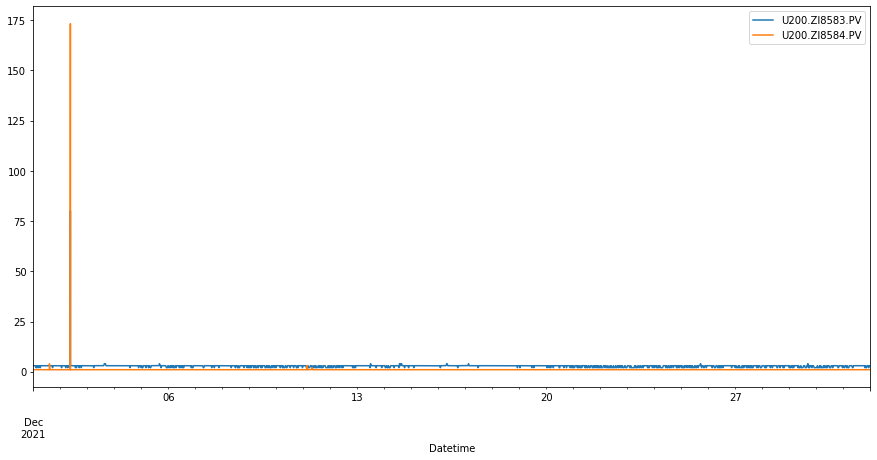

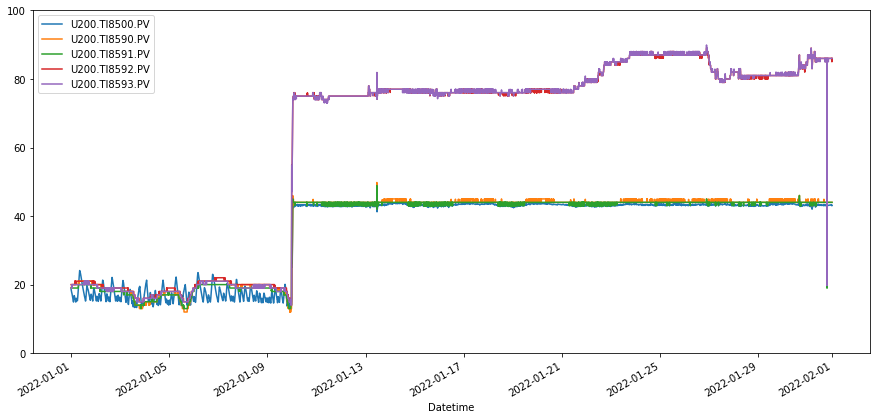

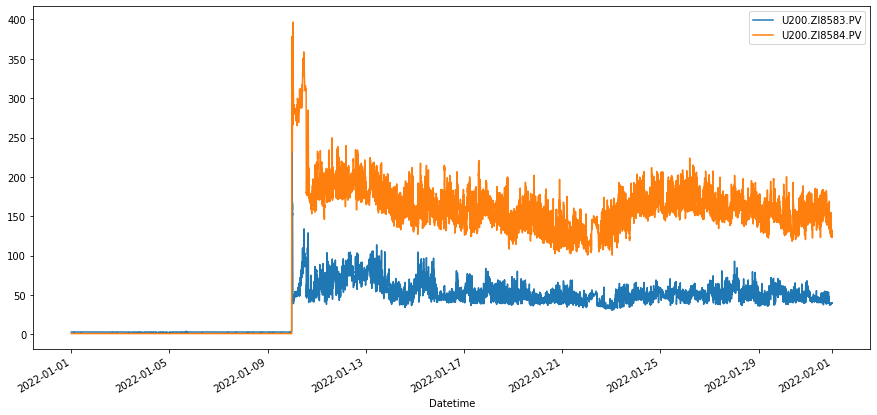

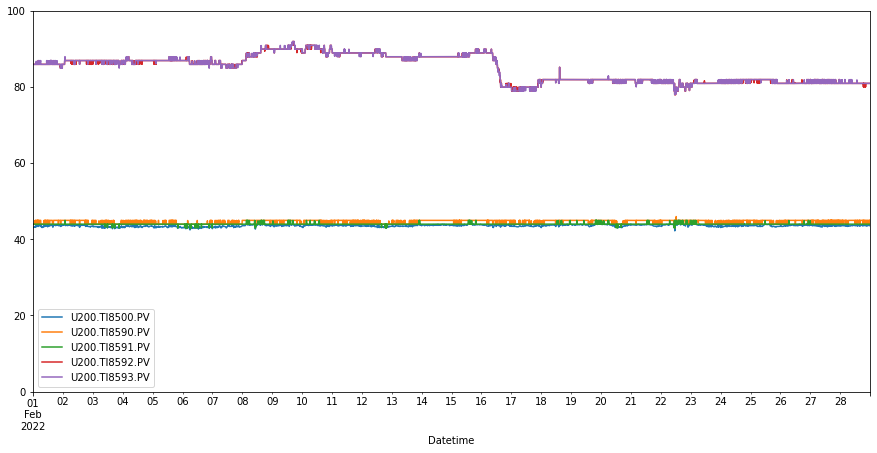

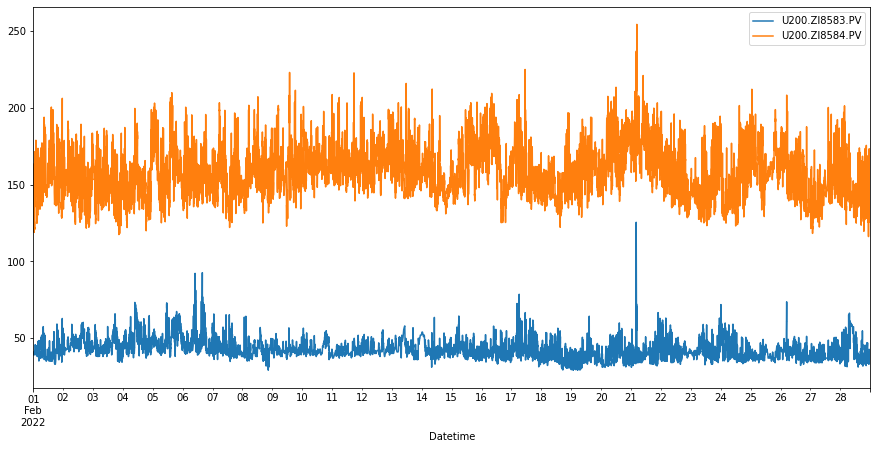

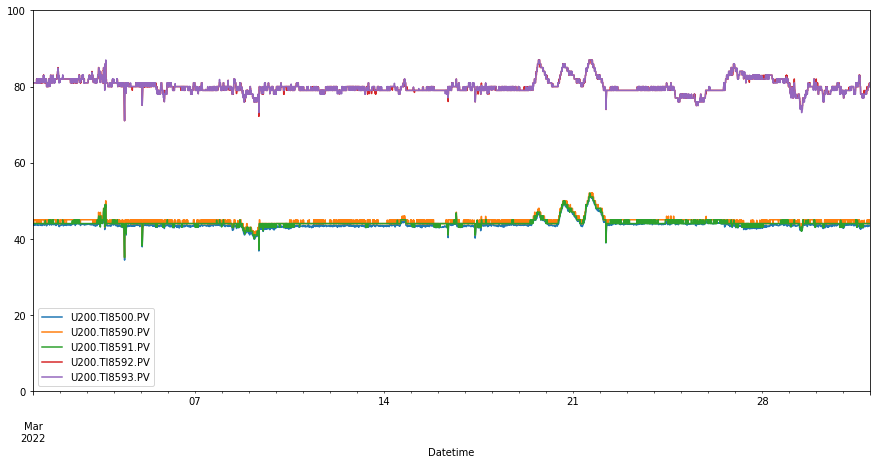

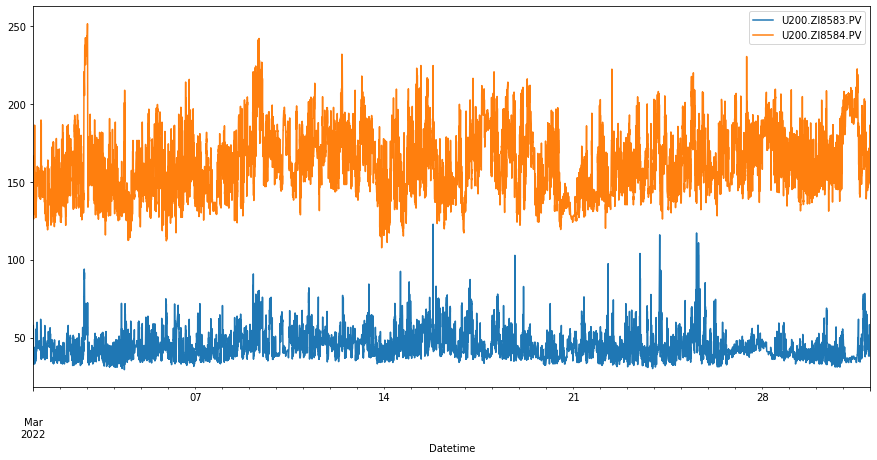

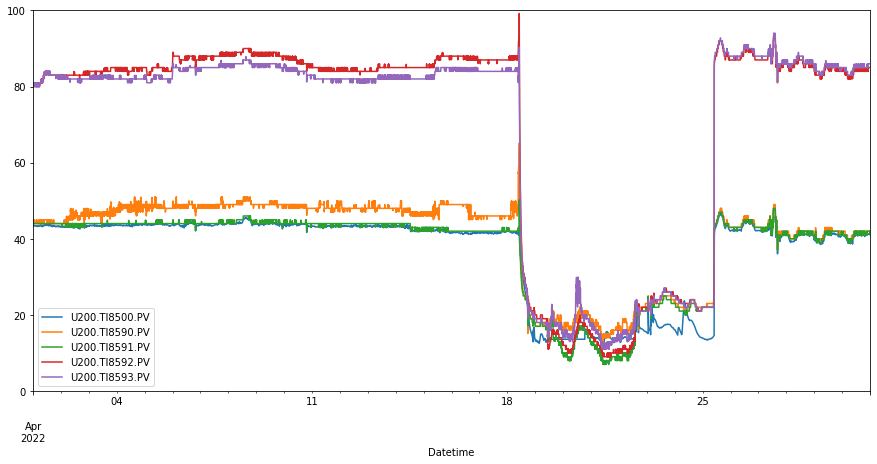

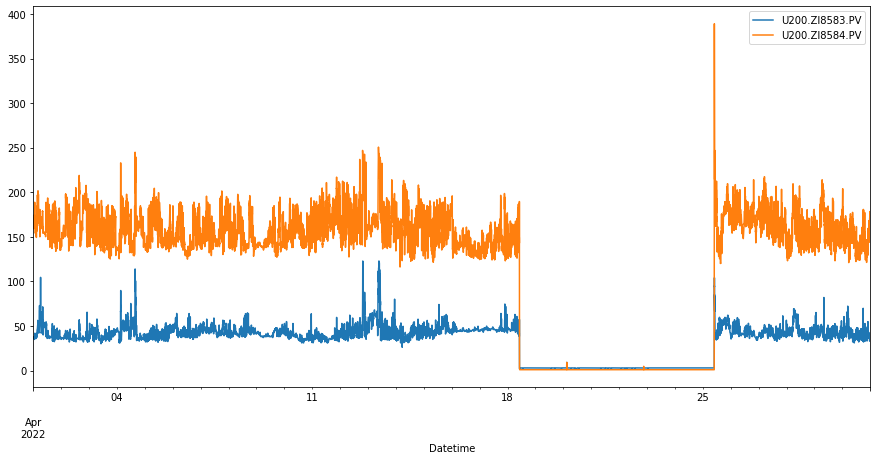

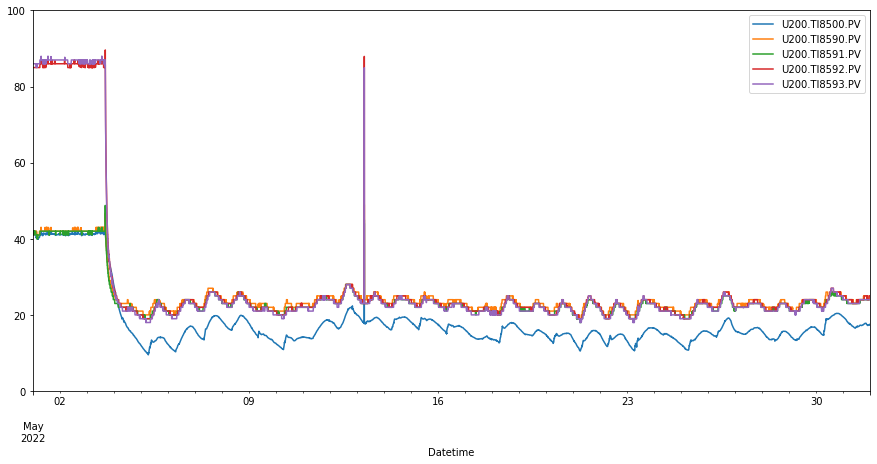

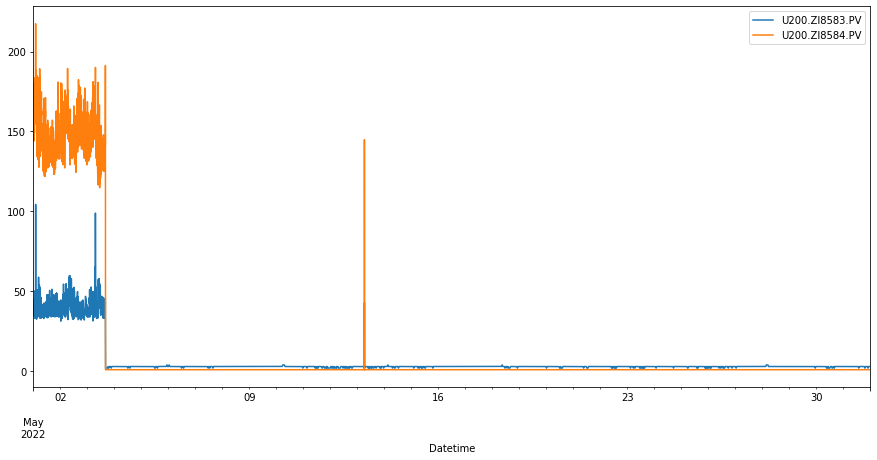

In [ ]:
month_rng = pd.date_range(start='1/2021', end='6/2022', freq='M').strftime('%Y-%m')
sensor = ['U200.TI8500.PV', 'U200.TI8590.PV', 'U200.TI8591.PV', 'U200.TI8592.PV', 'U200.TI8593.PV', 'U200.ZI8583.PV', 'U200.ZI8584.PV']

for month in month_rng:
    data_sort = df[sensor]
    data_sort[sensor[:5]].loc[month].plot(figsize=(15,7),
                                          ylim=[0,100])
    plt.show()
    data_sort[sensor[5:7]].loc[month].plot(figsize=(15,7))
    plt.show()

### Анализ матрицы корреляций

Построим матрицу корреляций для расчета статистической взаимосвязи показателей датчиков:

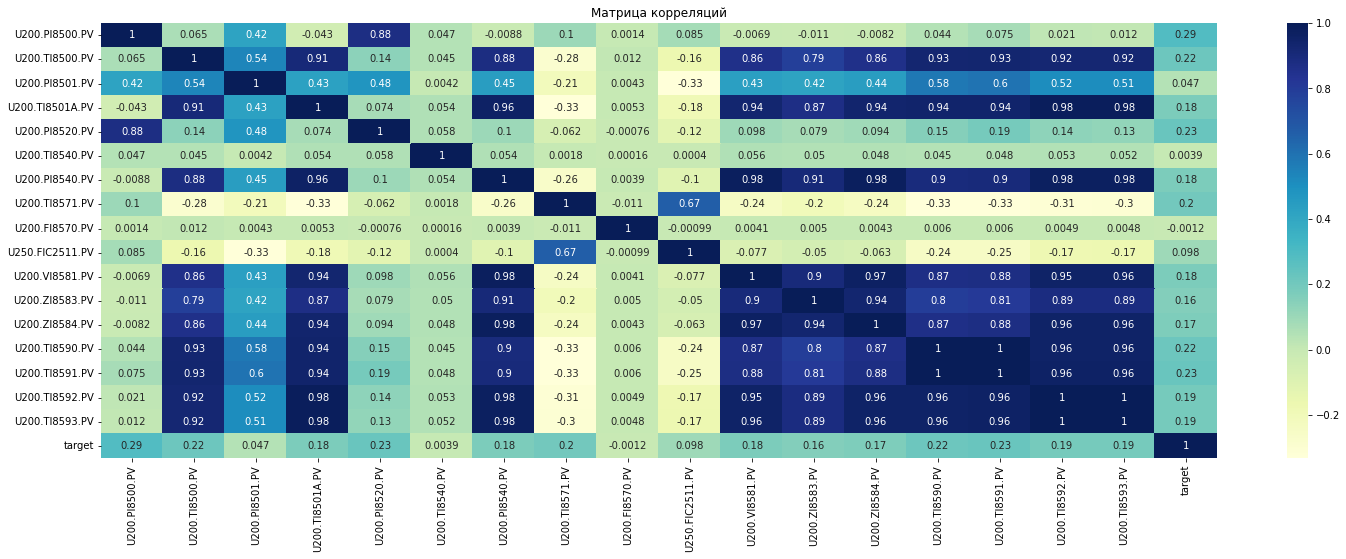

In [ ]:
plt.figure(figsize=(25,8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Матрица корреляций')
plt.show()

Выделим период нормальнйо работы оборудования за 2020-21 гг:

In [ ]:
tr1 = list(pd.date_range(start='2021-06-02', end='2021-06-06', freq='min'))
tr2 = list(pd.date_range(start='2021-06-08', end='2021-06-10', freq='min'))
#tr3 = list(pd.date_range(start='2021-09-22', end='2021-09-26', freq='min'))
tr4 = list(pd.date_range(start='2021-11-20', end='2021-11-29', freq='min'))
train_period = tr1+tr2+tr4 #+tr3
sensors = ['U200.TI8590.PV', 'U200.TI8591.PV','target'] #, 

In [ ]:
# выполним срез данных, выведем таблицу на экран
df_train = df.loc[train_period, sensors] 
df_train

,U200.TI8590.PV,U200.TI8591.PV,target
Datetime,,,
2021-06-02 00:00:00,40.0,40.0,1.0
2021-06-02 00:01:00,40.0,40.0,1.0
2021-06-02 00:02:00,40.0,40.0,1.0
2021-06-02 00:03:00,40.0,40.0,1.0
2021-06-02 00:04:00,40.0,40.0,1.0
...,...,...,...
2021-11-28 23:56:00,45.0,45.0,1.0
2021-11-28 23:57:00,45.0,45.0,1.0
2021-11-28 23:58:00,45.0,45.0,1.0


### Масштабирование данных

In [ ]:
# обучающая выборка
train_samp = df_train
X_train = train_samp.drop('target', axis=1)
y_train = train_samp.target

# тестовая выборка
test_samp = df[sensors]
X_test = test_samp.drop('target', axis=1)
y_test = test_samp.target

# масштабирование
scaler = MinMaxScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns, 
                              index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns, 
                             index=X_test.index)

## Модель

### Модель типа PCA для обнаружения аномалий:

Поскольку работа с данными датчиков большого размера часто является сложной задачей, существует несколько методов уменьшения количества переменных (уменьшение размерности). Одним из основных методов является анализ основных компонентов (PCA).

Сведем показания датчиков к компонентам, описывающим 99% дисперсии наших данных:

In [ ]:
pca = PCA(n_components = 0.99, svd_solver= 'full')

X_train_PCA = pca.fit_transform(X_train_scaled)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train_scaled.index

X_test_PCA = pca.transform(X_test_scaled)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test_scaled.index

**Расстояние Махаланобиса**

Расстояние Махаланобиса широко используется в методах кластерного анализа и классификации. 

Чтобы использовать расстояние Махаланобиса для классификации контрольной точки как принадлежащей одному из N классов, сначала оценивается ковариационная матрица каждого класса, обычно на основе выборок, которые, как известно, принадлежат каждому классу. 

В нашем случае, поскольку нас интересует только классификация “нормальное” и “аномальное”, мы используем обучающие данные, которые содержат только нормальные условия работы, для вычисления ковариационной матрицы. Затем, учитывая тестовую выборку, мы вычисляем расстояние Махаланобиса до “нормального” класса и классифицируем контрольную точку как “аномалию”, если расстояние превышает определенный порог.

**Определение функций, используемых в модели PCA:**

Напишем функцию для вычисления ковариационной матрицы:

In [ ]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

Вычислим расстояние Махаланобиса:

In [ ]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

Обнаружение выбросов:

In [ ]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

Вычислим пороговое значение (threshold) для классификации точки данных как аномалии:

In [ ]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

Проверим, является ли определитель матрицы положительным:

In [ ]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

**Настройка модели PCA:**

Определим набор обучающих / тестовых наборов из главных компонент:

In [ ]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

Вычислите ковариационную матрицу и ее обратную величину на основе данных в обучающем наборе:

In [ ]:
cov_matrix, inv_cov_matrix = cov_matrix(data_train)

Также вычислим среднее значение для входных переменных в обучающем наборе, поскольку оно используется позже для вычисления расстояния Махаланобиса до точек данных в тестовом наборе

In [ ]:
mean_distr = data_train.mean(axis=0)

Используя ковариационную матрицу и ее обратную, мы можем вычислить расстояние Махаланобиса для обучающих данных, определяющих “нормальные условия”, и найти пороговое значение, чтобы пометить точки данных как аномалию. Затем можно вычислить расстояние Махаланобиса для точек данных в тестовом наборе и сравнить его с порогом аномалии.

In [ ]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
print('Пороговое значение для определения аномалии - ', threshold)

Пороговое значение для определения аномалии -  3.841682770070614


**Пороговое значение для определения аномалии:**

Квадрат расстояния Махаланобиса до центра тяжести распределения должен соответствовать распределению χ2, если выполняется предположение о нормально распределенных входных переменных. Это также предположение, лежащее в основе приведенного выше вычисления “порогового значения” для выявления аномалии. Поскольку в нашем случае это предположение не обязательно выполняется, полезно визуализировать распределение расстояния Махаланобиса, чтобы установить хорошее пороговое значение для выявления аномалий.

Мы начинаем с визуализации квадрата расстояния Махаланобиса, которое в идеале должно соответствовать распределению χ2.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 15.0)

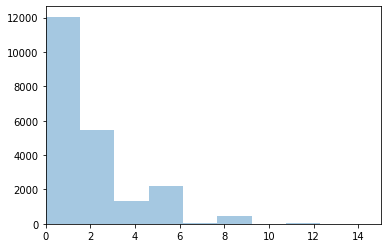

In [ ]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10,
             kde= False);
plt.xlim([0.0,15]) #plt.xlim([0.0,15])

Затем визуализируем само расстояние Махаланобиса:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

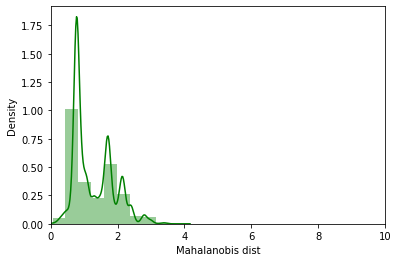

In [ ]:
plt.figure()
sns.distplot(dist_train,
             bins = 10,
             kde = True,
             color = 'green');
plt.xlim([0.0,10])
plt.xlabel('Mahalanobis dist')

Из приведенных выше распределений вычисленное пороговое значение **3,8** для определения аномалии кажется разумным.

Затем мы можем сохранить расстояние Махаланобиса, а также пороговое значение и переменную “флаг аномалии” как для обучающих, так и для тестовых данных во фрейме данных:

In [ ]:
# обучающий набор
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

# выведем полученную таблицу на обучающей выборке
display(anomaly_train.head())

# тестовый набор
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index


# выведем полученную таблицу на тестовой выборке
display(anomaly.head())

,Mob dist,Thresh,Anomaly
Datetime,,,
2021-06-02 00:00:00,2.15881,3.841683,False
2021-06-02 00:01:00,2.15881,3.841683,False
2021-06-02 00:02:00,2.15881,3.841683,False
2021-06-02 00:03:00,2.15881,3.841683,False
2021-06-02 00:04:00,2.15881,3.841683,False


,Mob dist,Thresh,Anomaly
Datetime,,,
2021-01-01 00:00:00,12.062659,3.841683,True
2021-01-01 00:01:00,12.062659,3.841683,True
2021-01-01 00:02:00,12.062659,3.841683,True
2021-01-01 00:03:00,12.062659,3.841683,True
2021-01-01 00:04:00,12.062659,3.841683,True


На основе вычисленной статистики любое расстояние, превышающее пороговое значение, будет помечено как аномалия.

In [ ]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
#anomaly_alldata.to_csv('Anomaly_distance.csv')

**Проверка модели PCA на тестовых данных:**

Теперь мы можем построить расчетную метрику аномалий (Mob dist) и проверить, когда она пересекает порог аномалии. Ось Y логарифмическая:

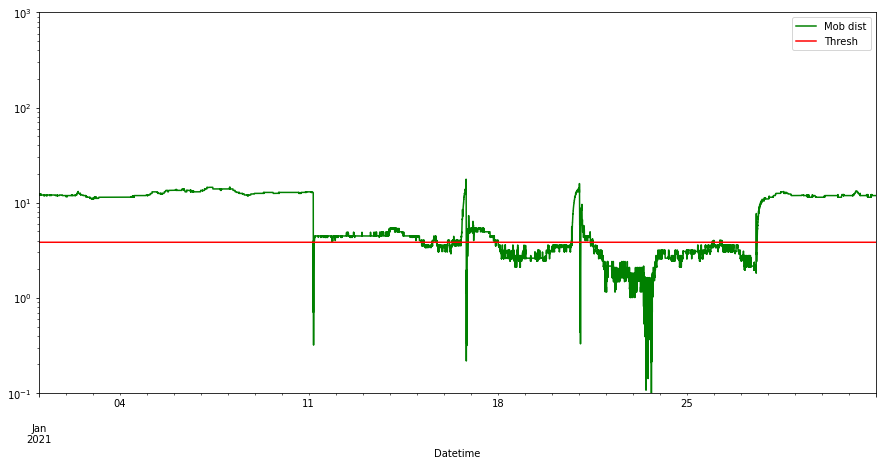

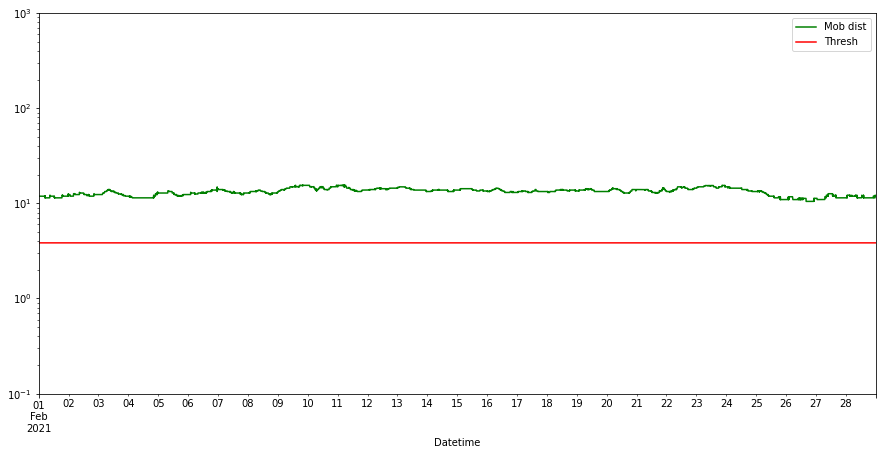

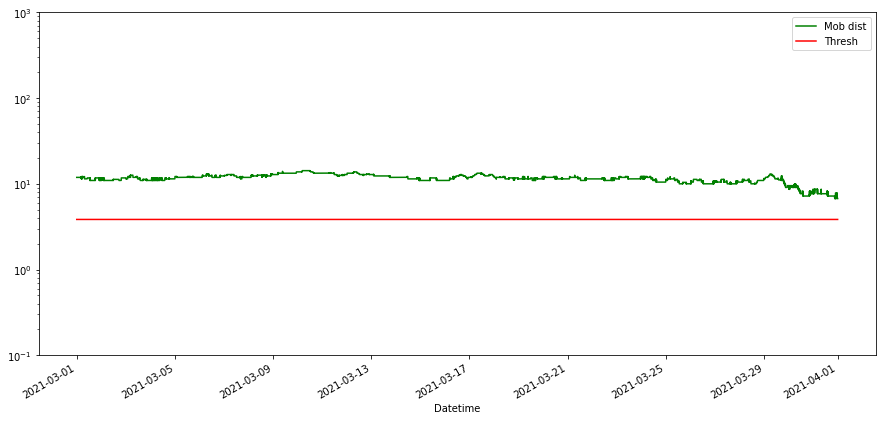

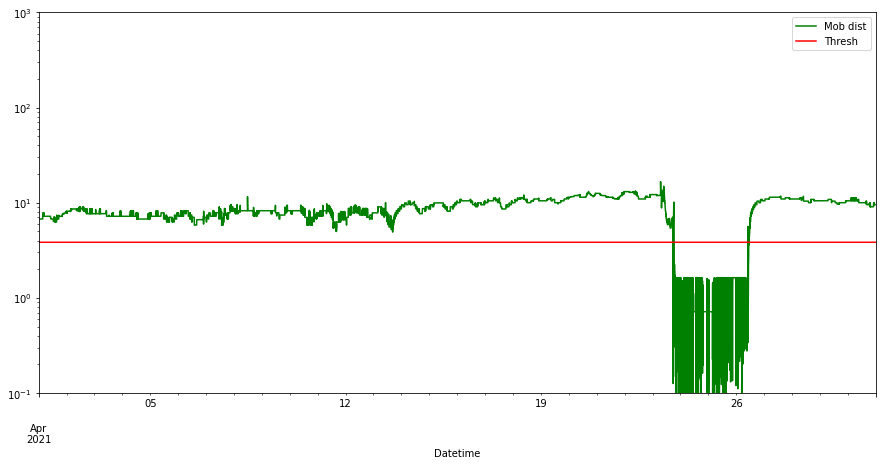

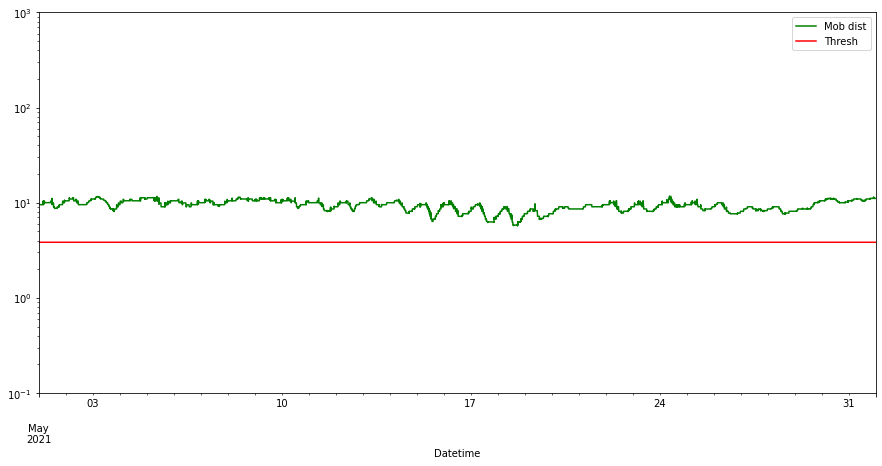

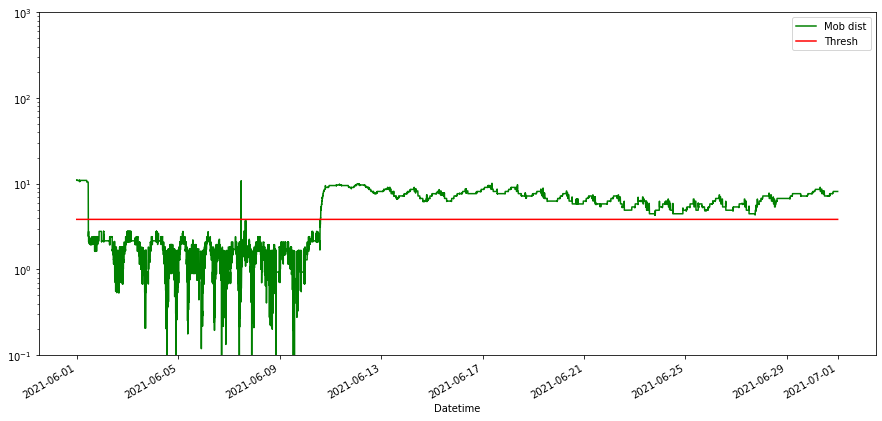

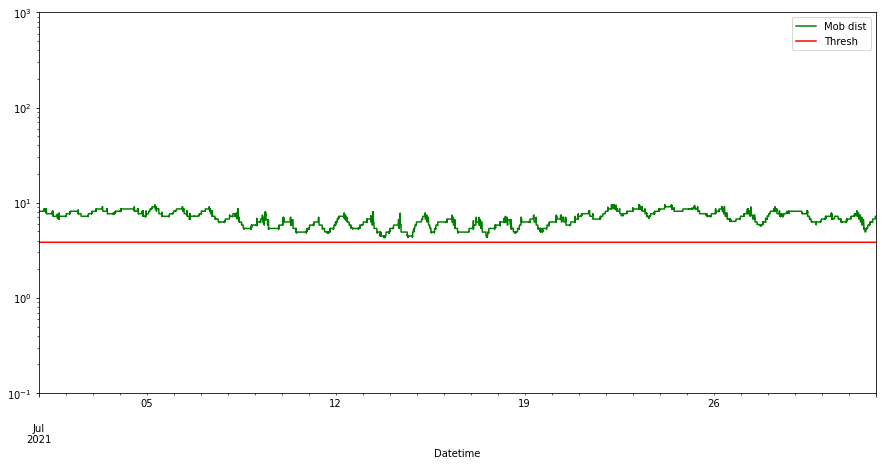

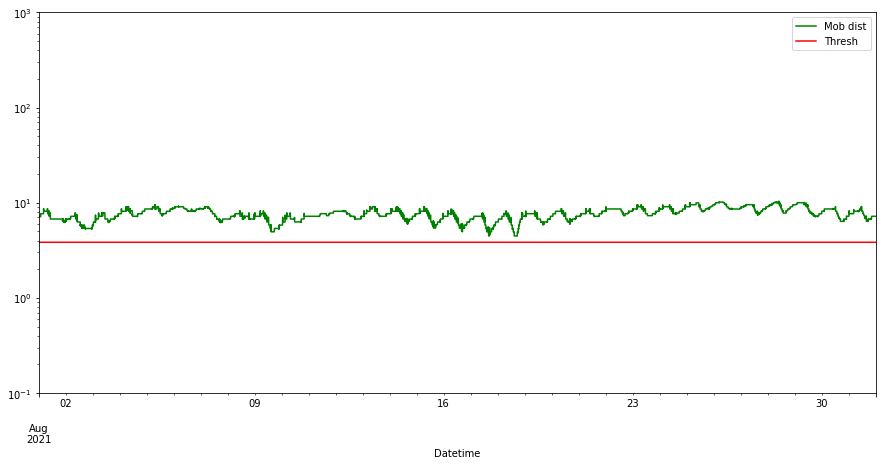

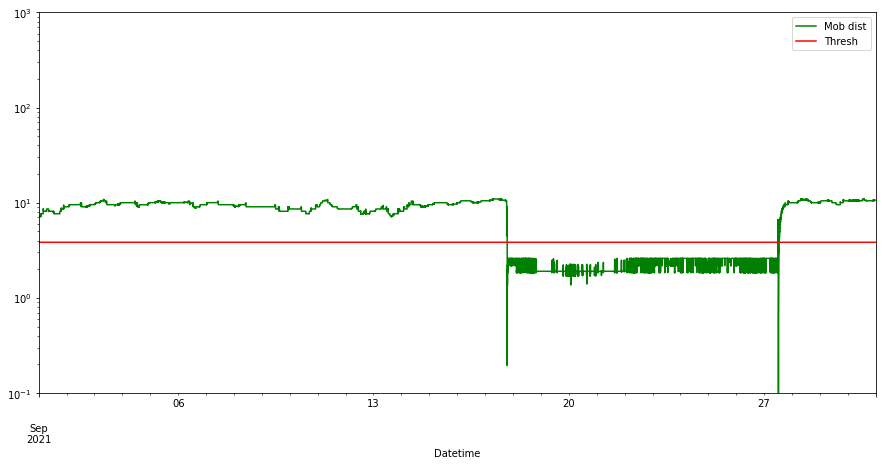

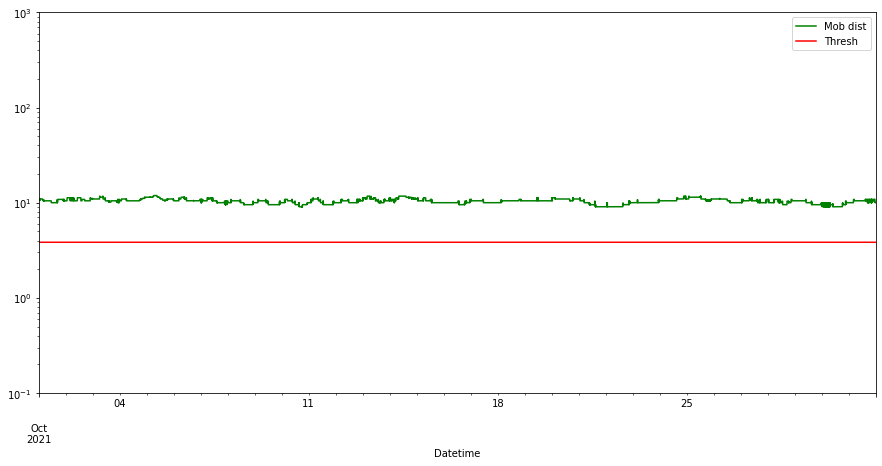

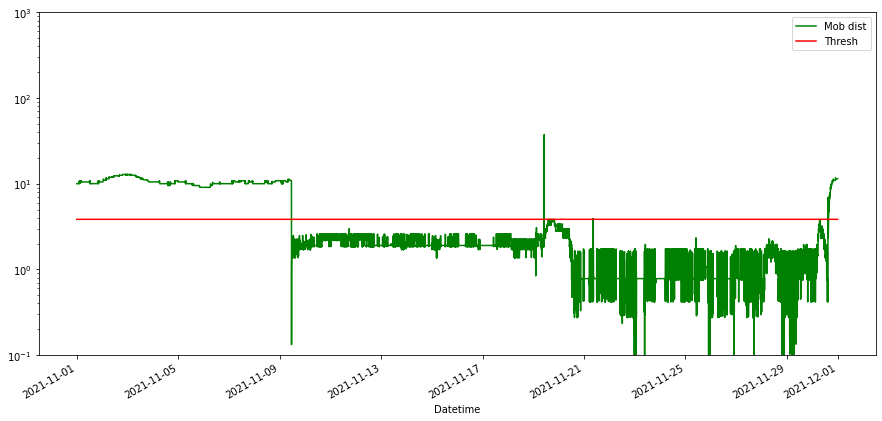

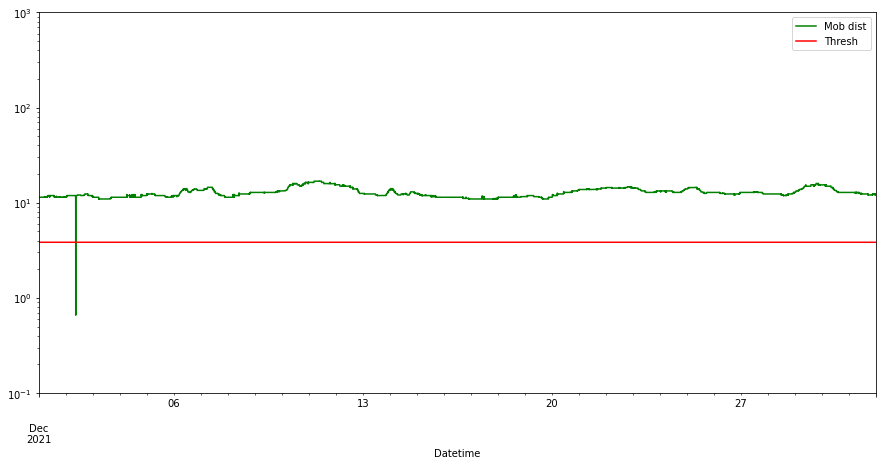

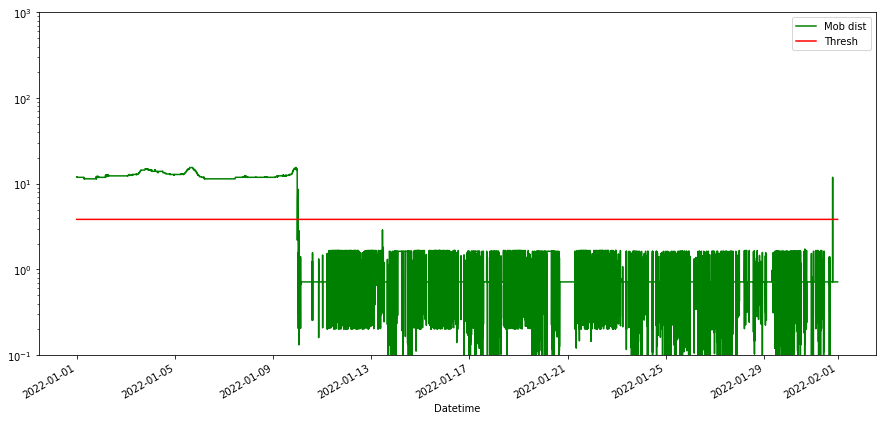

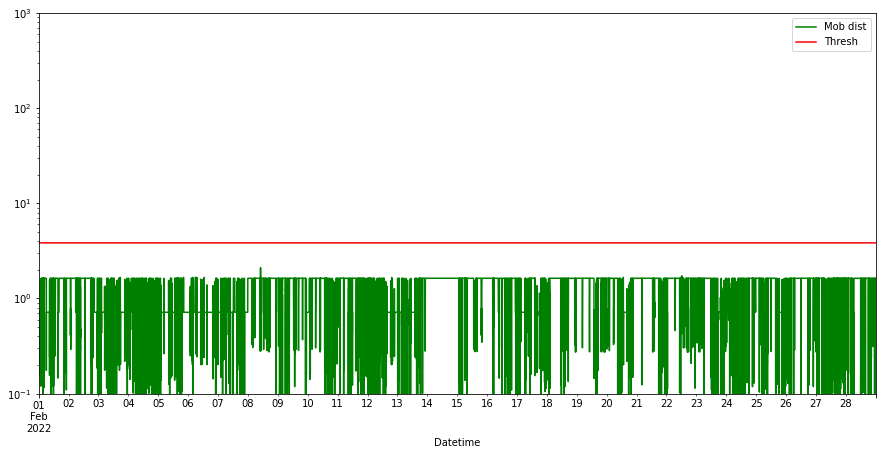

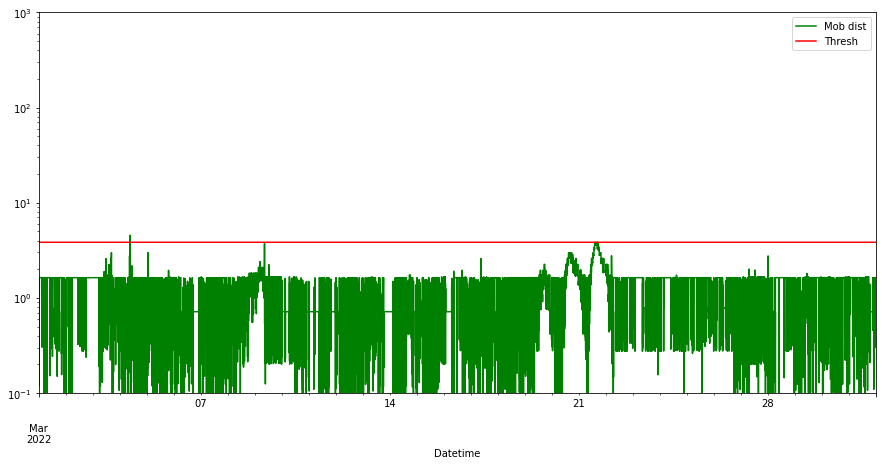

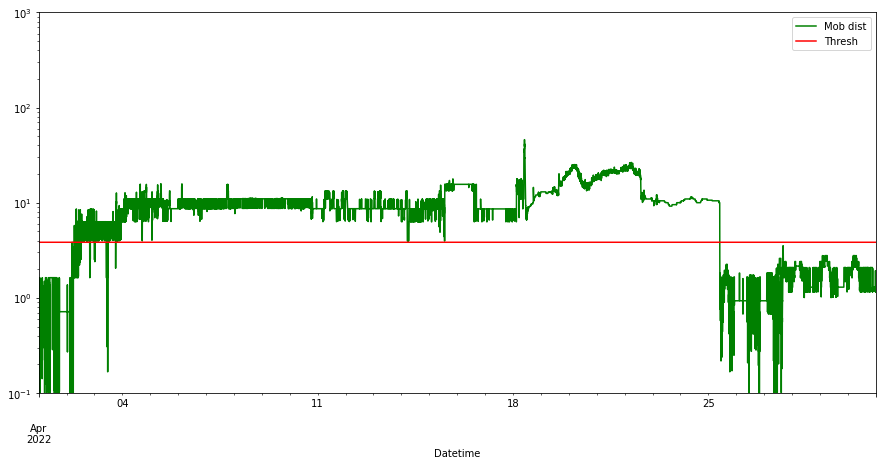

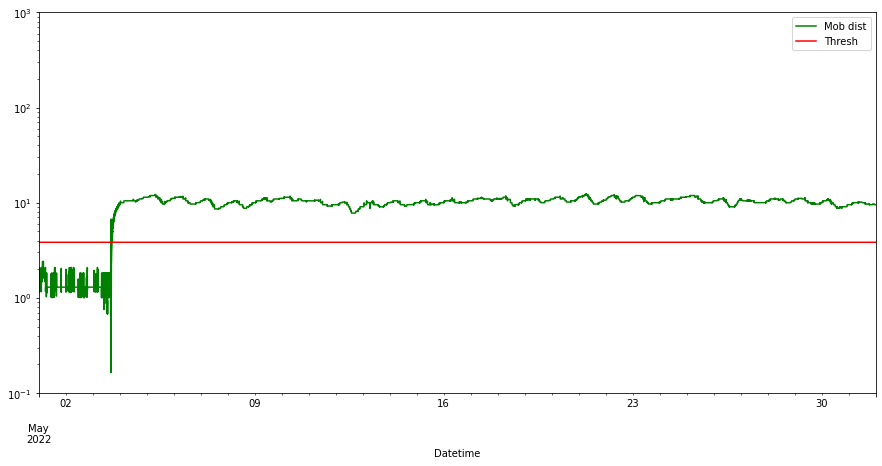

In [ ]:
month_rng = pd.date_range(start='1/2021', end='6/2022', freq='M').strftime('%Y-%m')

for date in month_rng:
    anomaly_alldata.loc[date].plot(logy=True,
                                   figsize=(15,7),
                                   ylim=[1e-1,1e3],
                                   color=['green','red'])

Из приведенного выше рисунка мы видим, что модель способна обнаружить аномалию примерно за несколько недель до фактического отказа/останова.

### Модель автоэнкодера для обнаружения аномалий

Основная идея здесь заключается в использовании нейронной сети автокодирования для "сжатия" показаний датчиков до низкоразмерного представления, которое фиксирует корреляции и взаимодействия между различными переменными. (По сути, тот же принцип, что и в модели PCA, но здесь мы также учитываем нелинейности между входными переменными).

**Определение сети автокодирования:**

Мы используем 3-слойную нейронную сеть: первый слой имеет 10 узлов, средний слой имеет 2 узла, а третий слой имеет 10 узлов. Мы используем среднеквадратичную ошибку в качестве функции потерь и обучаем модель с помощью оптимизатора “Adam”.

In [ ]:
seed(10)
tensorflow.random.set_seed(10)
act_func = 'elu'

# инициализация модели:
model=Sequential()
# первый слой 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train_scaled.shape[1],)
               )
         )
# второй слой
model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))
# третий слой
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))
# выход
model.add(Dense(X_train_scaled.shape[1],
                kernel_initializer='glorot_uniform'))
# паарметры сети: функция потерь, оптимизатор
model.compile(loss='mse',optimizer='adam')

# кол-во эпох, размер пакета
NUM_EPOCHS=10 # 100
BATCH_SIZE=10

**Подгонка модели:**

Чтобы отслеживать точность во время обучения, мы используем 5% обучающих данных для проверки после каждой эпохи (validation_split = 0,05)

In [ ]:
history=model.fit(np.array(X_train_scaled),np.array(X_train_scaled),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Epoch 1/10
2053/2053 [==============================] - 4s 2ms/step - loss: 0.0030 - val_loss: 7.5426e-05
Epoch 2/10
2053/2053 [==============================] - 3s 2ms/step - loss: 3.6471e-05 - val_loss: 9.7355e-06
Epoch 3/10
2053/2053 [==============================] - 3s 2ms/step - loss: 6.1391e-06 - val_loss: 9.0366e-07
Epoch 4/10
2053/2053 [==============================] - 3s 2ms/step - loss: 7.9015e-07 - val_loss: 2.9210e-07
Epoch 5/10
2053/2053 [==============================] - 5s 2ms/step - loss: 5.9507e-07 - val_loss: 4.0237e-07
Epoch 6/10
2053/2053 [==============================] - 3s 2ms/step - loss: 4.8595e-07 - val_loss: 8.4181e-08
Epoch 7/10
2053/2053 [==============================] - 4s 2ms/step - loss: 5.2897e-07 - val_loss: 4.4817e-07
Epoch 8/10
2053/2053 [==============================] - 3s 2ms/step - loss: 5.5717e-07 - val_loss: 1.3275e-06
Epoch 9/10
2053/2053 [==============================] - 3s 2ms/step - loss: 2.4531e-07 - val_loss: 3.0887e-07
Epoch 10/10
20

**Визуализируем потерю обучения / проверки:**

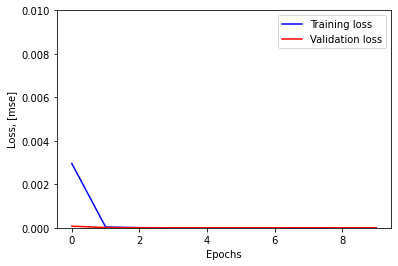

In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.01])
plt.show()

**Распределение функции потерь в обучающем наборе:**

Построив график распределения вычисленных потерь в обучающем наборе, можно использовать это для определения подходящего порогового значения для выявления аномалии. При этом можно убедиться, что этот порог установлен выше “уровня шума”, и что любые отмеченные аномалии должны быть статистически значимыми выше шумового фона.

In [ ]:
X_pred = model.predict(np.array(X_train_scaled))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train_scaled.columns)
X_pred.index = X_train_scaled.index

scored = pd.DataFrame(index=X_train_scaled.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train_scaled), axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

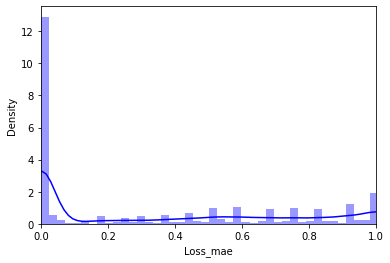

In [ ]:
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 100, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,1])

In [ ]:
threshold2 = scored['Loss_mae'].quantile(q=0.997)
print('Порог для обнаружения аномалии (99,7 % всех значений лежат в пределах 3-х ст.отклон)', threshold2)

Порог для обнаружения аномалии (99,7 % всех значений лежат в пределах 3-х ст.отклон) 0.0005234431009739637


Исходя из приведенного выше распределения потерь и порога рассчитаем потери на тестовом наборе:

In [ ]:
X_pred = model.predict(np.array(X_test_scaled))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test_scaled.columns)
X_pred.index = X_test_scaled.index

scored = pd.DataFrame(index=X_test_scaled.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test_scaled), axis = 1)
scored['Threshold'] = threshold2
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
Datetime,,,
2021-01-01 00:00:00,1.380365,0.000523,True
2021-01-01 00:01:00,1.380365,0.000523,True
2021-01-01 00:02:00,1.380365,0.000523,True
2021-01-01 00:03:00,1.380365,0.000523,True
2021-01-01 00:04:00,1.380365,0.000523,True


Затем мы вычисляем те же показатели для обучающего набора и объединим все данные в одну таблицу:

In [ ]:
X_pred_train = model.predict(np.array(X_train_scaled))
X_pred_train = pd.DataFrame(X_pred_train, 
                            columns=X_train_scaled.columns)
X_pred_train.index = X_train_scaled.index

scored_train = pd.DataFrame(index=X_train_scaled.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train_scaled), axis = 1)
scored_train['Threshold'] = threshold2
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

**Результаты модели автоэнкодера:**

Рассчитав распределение потерь и порог аномалии, мы можем визуализировать выходные данные модели за время, предшествующее отказу подшипника:

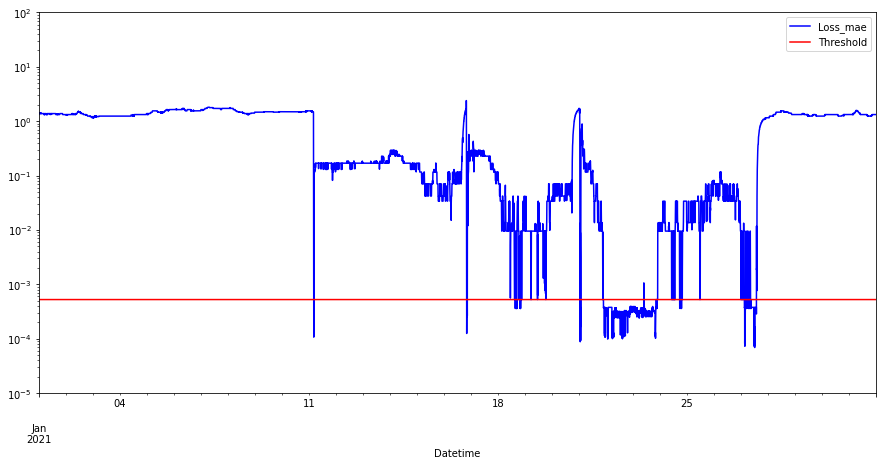

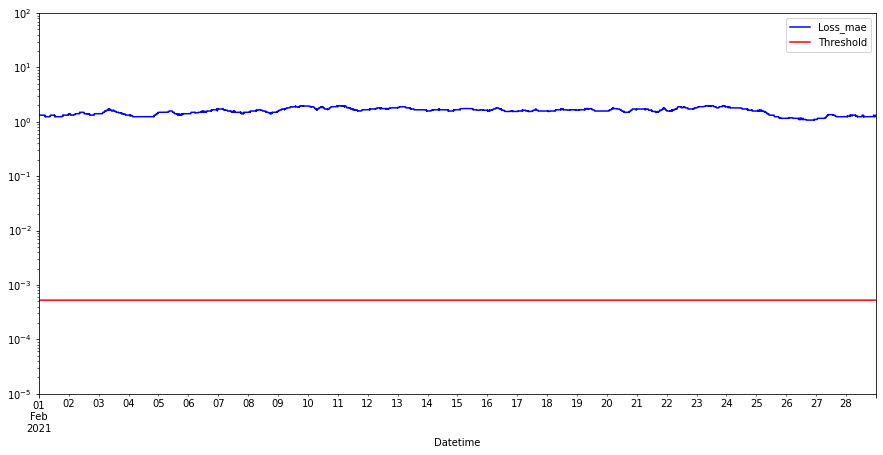

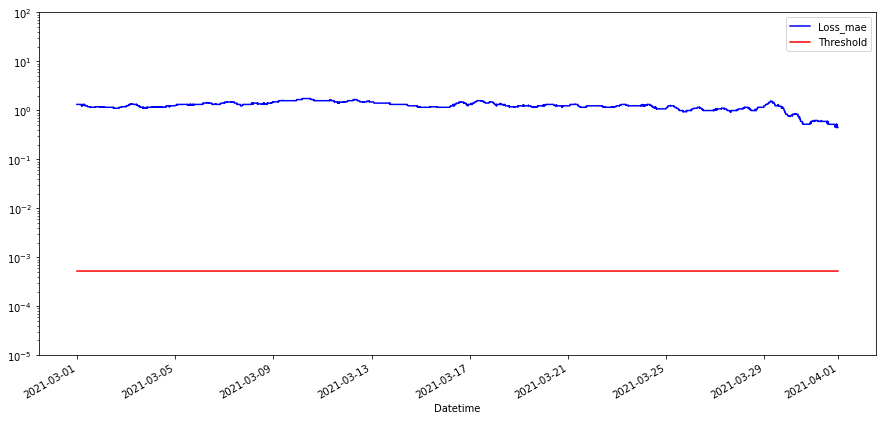

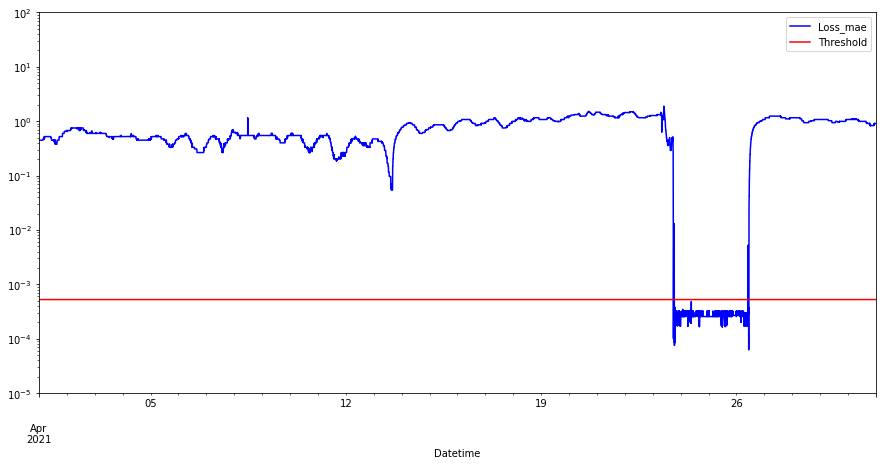

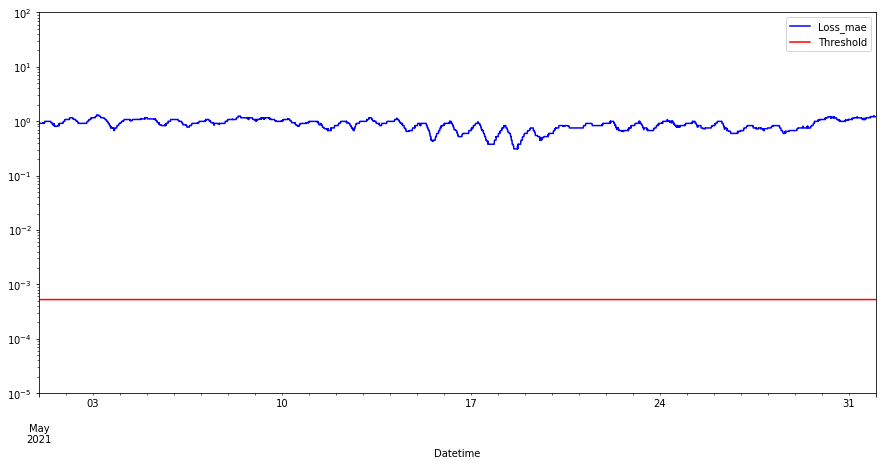

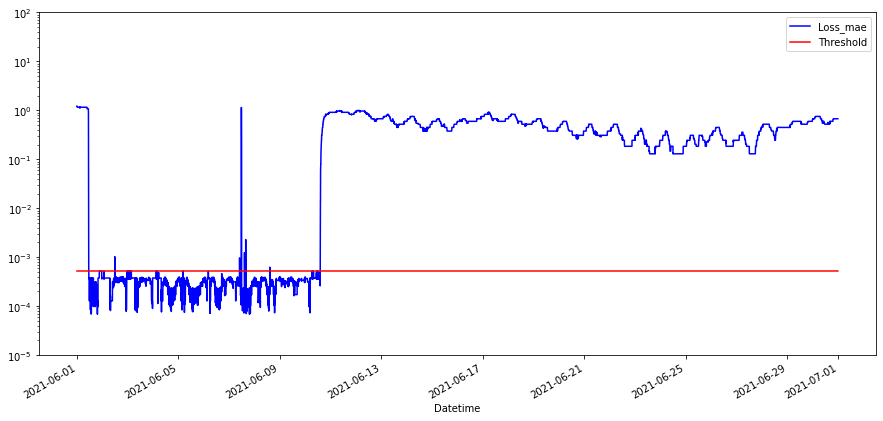

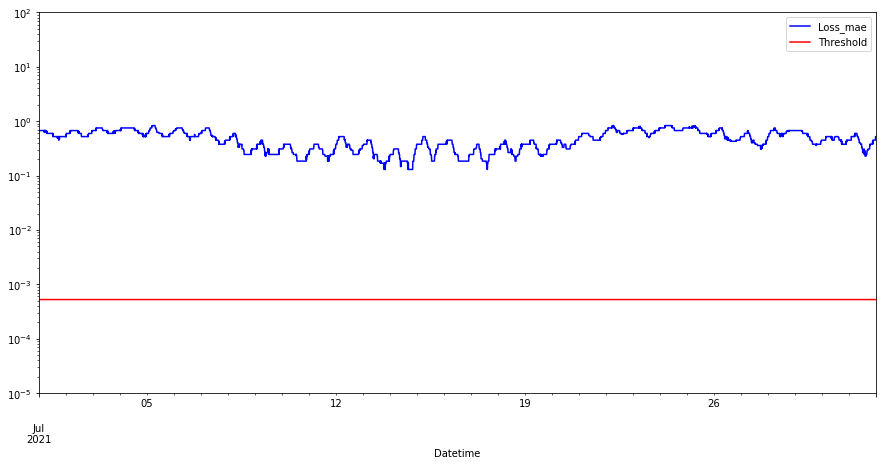

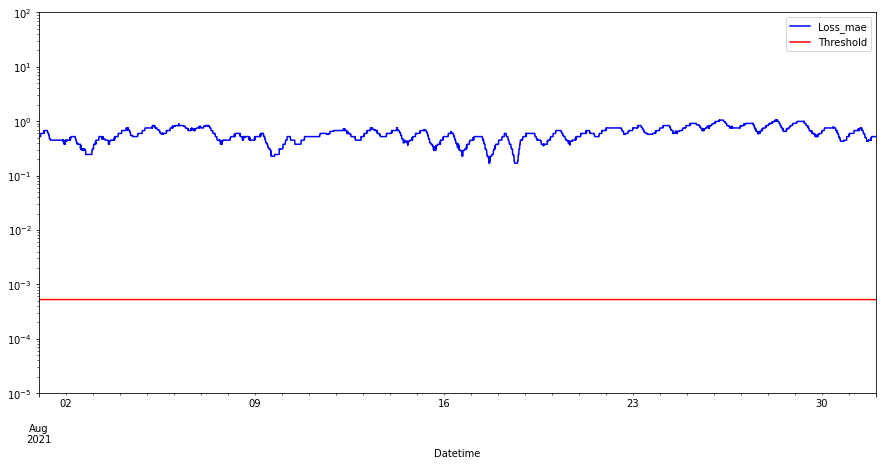

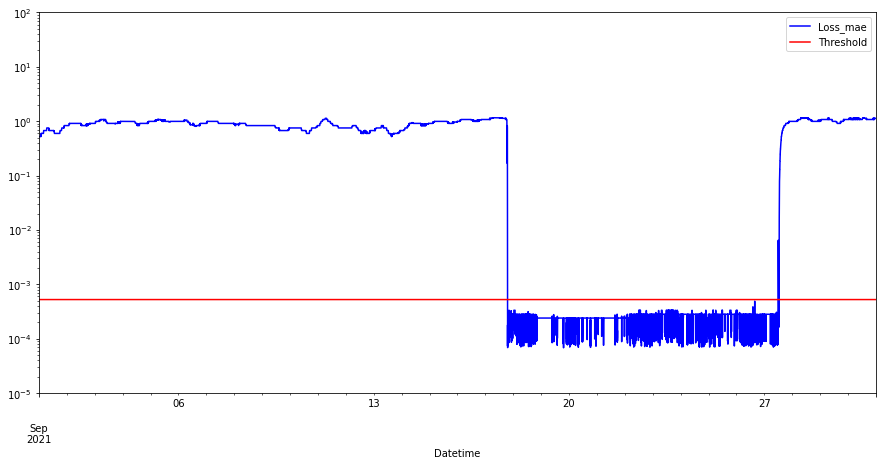

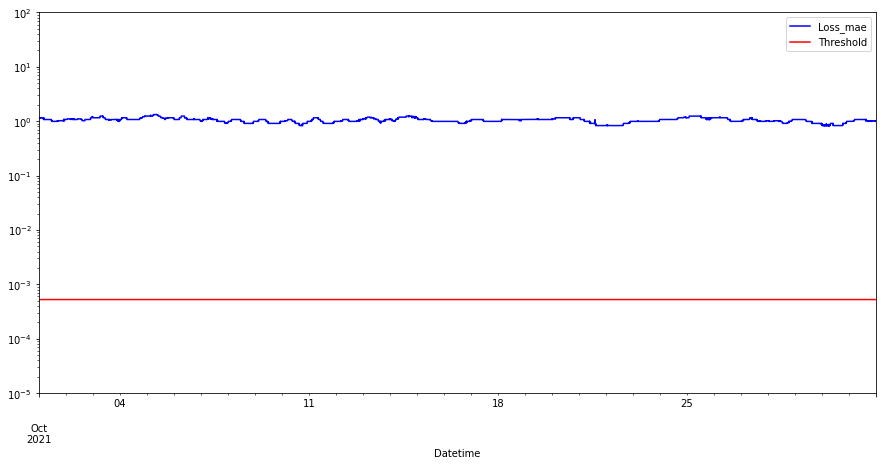

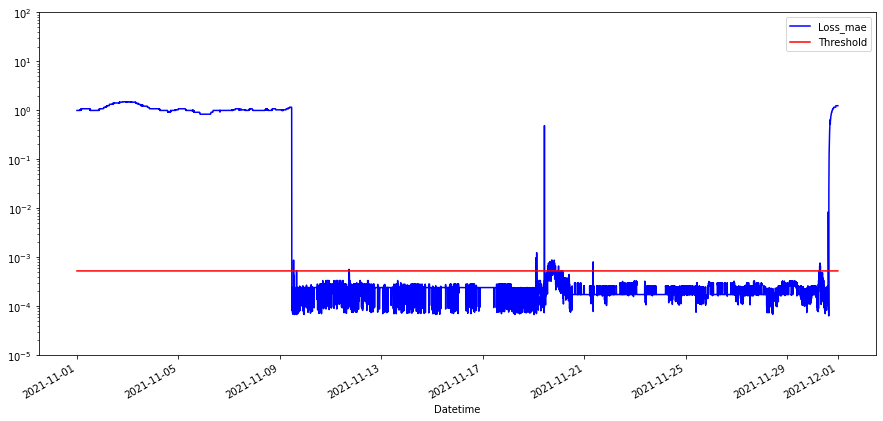

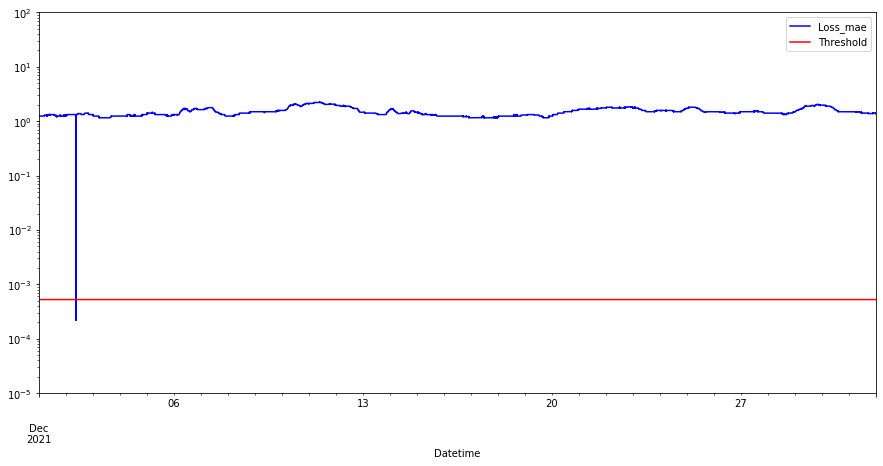

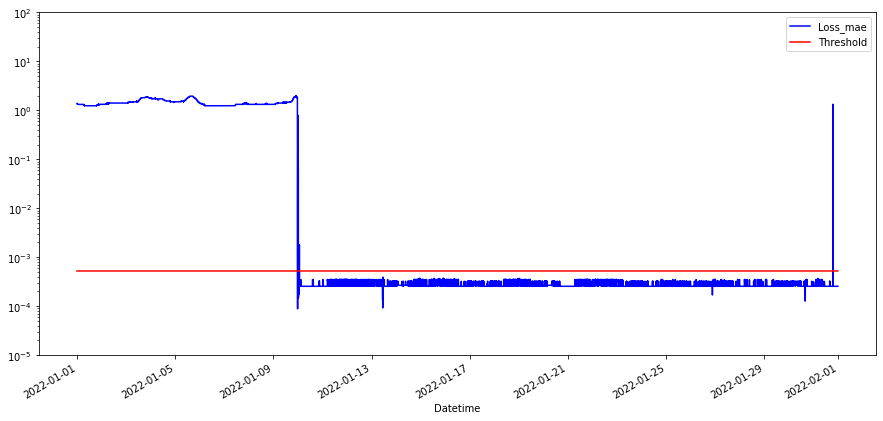

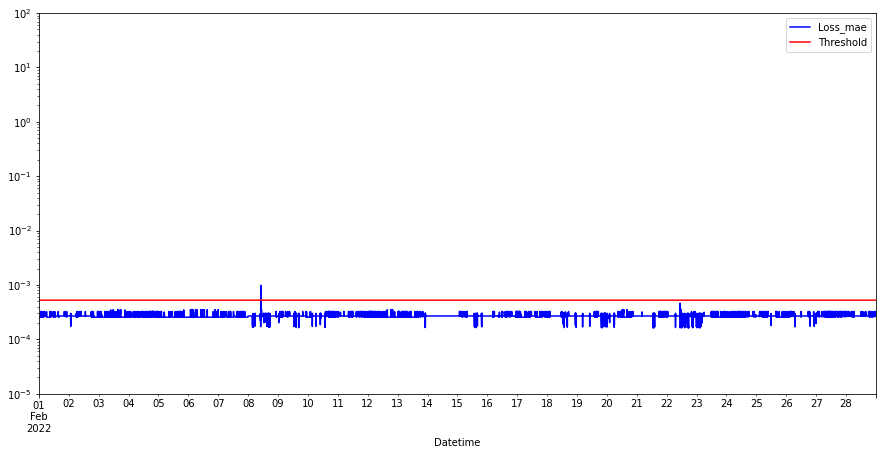

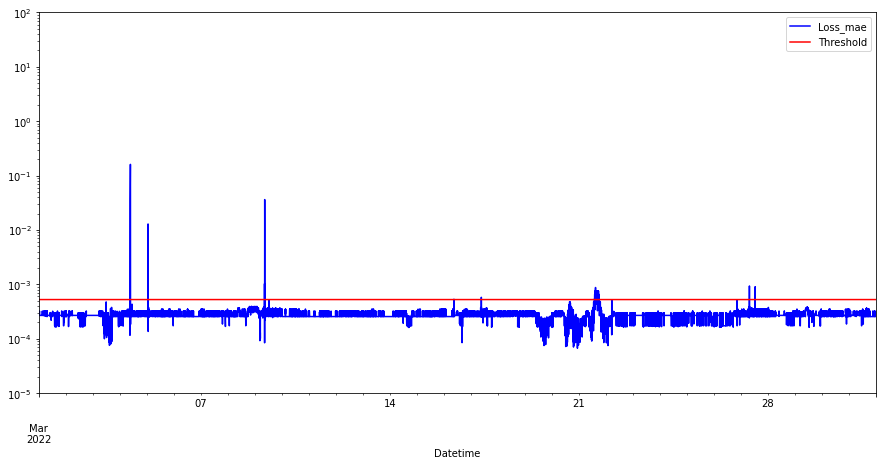

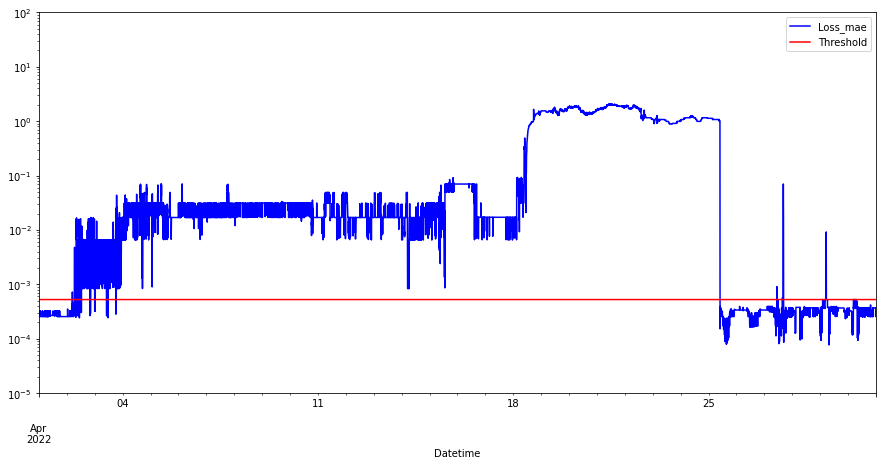

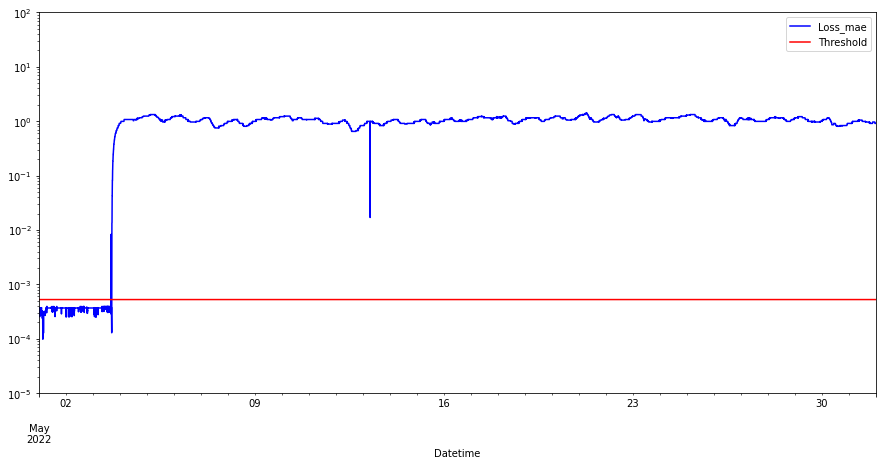

In [ ]:
month_rng = pd.date_range(start='1/2021', end='6/2022', freq='M').strftime('%Y-%m')

for month in month_rng:
    scored.loc[month].plot(logy=True,
                       figsize = (15,7),
                       ylim = [1e-5,1e2],
                       color = ['blue','red'])

## Итоги исследования

Оба подхода к моделированию дают схожие результаты, который позволяют выявить предстоящую неисправность задолго до фактического отказа. Основное различие заключается в том, как определить подходящее пороговое значение для выявления аномалий, чтобы избежать многих ложных срабатываний при нормальных условиях эксплуатации.